In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(130298) # to have the same random numbers

In [3]:
%pwd

'C:\\Users\\Eleonora\\statistical learning for healthcare data\\progetto'

In [4]:
df = pd.read_csv('dat.csv')
df.shape

(2008, 167)

In [5]:
df.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
1,2,743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
2,3,866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
3,4,775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
4,5,810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"


In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.set_index('inpatient.number', inplace = True)
df.head()

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,87,19,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,95,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,98,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,73,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,88,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"


Remove variables where we have more than half of the values missing: these columns are not useful, as an imputation over such proportions would lead to biased predictions, as the final model will not take into account the variability linked to the imputation technique.

In [6]:
missing_perc = df.isnull().sum()/len(df)
columns_missing = df.columns[np.where(missing_perc>0.5)]
len(columns_missing)

43

In [7]:
columns_missing

Index(['LVEF', 'mitral.valve.EMS', 'mitral.valve.AMS', 'EA',
       'tricuspid.valve.return.velocity', 'tricuspid.valve.return.pressure',
       'time.of.death..days.from.admission.',
       're.admission.time..days.from.admission.',
       'time.to.emergency.department.within.6.months', 'myoglobin',
       'Inorganic.Phosphorus', 'serum.magnesium', 'high.sensitivity.protein',
       'cholinesterase', 'glutamic.oxaliplatin',
       'erythrocyte.sedimentation.rate', 'homocysteine', 'apolipoprotein.A',
       'apolipoprotein.B', 'lipoprotein', 'pH', 'standard.residual.base',
       'standard.bicarbonate', 'partial.pressure.of.carbon.dioxide',
       'total.carbon.dioxide', 'methemoglobin', 'hematocrit.blood.gas',
       'reduced.hemoglobin', 'potassium.ion', 'chloride.ion', 'sodium.ion',
       'glucose.blood.gas', 'lactate', 'measured.residual.base',
       'measured.bicarbonate', 'carboxyhemoglobin',
       'body.temperature.blood.gas', 'oxygen.saturation',
       'partial.oxygen.press

# Analysis column by column

In [8]:
data = df.copy()
data.drop(columns = list(columns_missing), inplace = True)
data.head()

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,...,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,...,18.3,4.9,61.9,3.46,1.90,2.69,0.84,15,11,"(69,79]"
1,2,743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,...,18.3,2.4,66.1,3.15,1.26,0.84,1.30,15,8,"(69,79]"
2,3,866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,...,11.9,2.4,60.8,3.79,2.13,1.53,0.94,15,5,"(59,69]"
3,4,775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,...,51.6,9.4,67.1,2.92,1.31,0.92,0.98,15,11,"(69,79]"
4,5,810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,...,11.8,3.3,71.9,2.68,1.21,0.62,0.91,15,5,"(69,79]"


In [9]:
# pass the column as data['col_name']
def in_range(column, min_rng, max_rng):
    "return percentage of anomalies for each variable"
    count = 0
    for elem in column:
        if elem < min_rng or elem > max_rng:
            count += 1

    return count/data.shape[0]

### 1) DestinationDischarge

<AxesSubplot:xlabel='DestinationDischarge', ylabel='Count'>

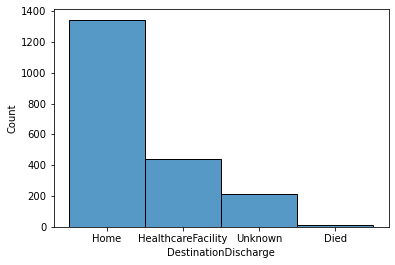

In [12]:
sns.histplot(data['DestinationDischarge'])

In [13]:
data['DestinationDischarge'].value_counts()

Home                  1344
HealthcareFacility     438
Unknown                212
Died                    14
Name: DestinationDischarge, dtype: int64

We consider the value "Unknown" as NaN (and put it as a sentinel).

### 2) admission.ward

Cardiology     1547
GeneralWard     265
Others          181
ICU              15
Name: admission.ward, dtype: int64

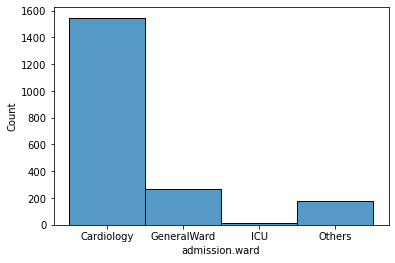

In [15]:
sns.histplot(data['admission.ward'])
data['admission.ward'].value_counts()

### 3) admission.way

NonEmergency    1052
Emergency        956
Name: admission.way, dtype: int64


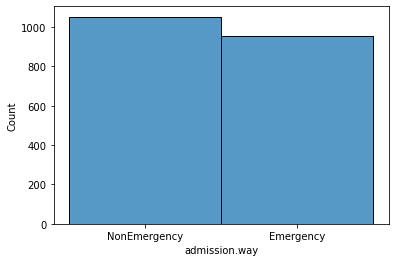

In [16]:
sns.histplot(data['admission.way'])
print(data['admission.way'].value_counts())

### 4) occupation

UrbanResident    1670
farmer            198
Others             89
worker             17
Officer             7
Name: occupation, dtype: int64

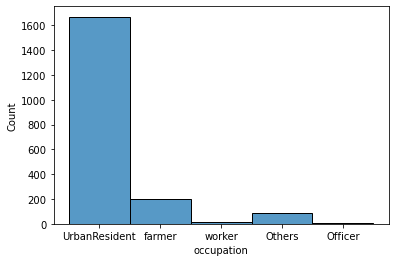

In [17]:
column_name = 'occupation'
sns.histplot(data[column_name].dropna()) 
data[column_name].value_counts()

### 5) discharge.department

Cardiology     1703
GeneralWard     241
Others           52
ICU              12
Name: discharge.department, dtype: int64

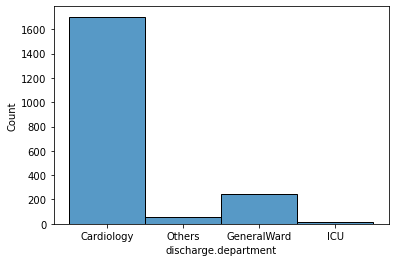

In [18]:
column_name = 'discharge.department'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 6) visit.times

1    1860
2     120
3      20
4       6
5       2
Name: visit.times, dtype: int64

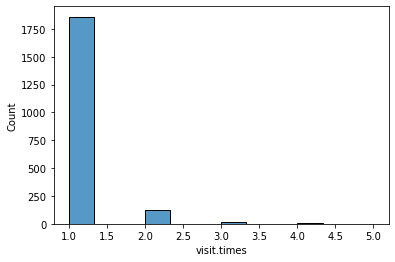

In [19]:
column_name = 'visit.times'
sns.histplot(data[column_name])

data[column_name].value_counts()

This variable can be considered as categorical, but it is ordinal, so we will leave it as it is.

### 7) gender

Female    1163
Male       845
Name: gender, dtype: int64

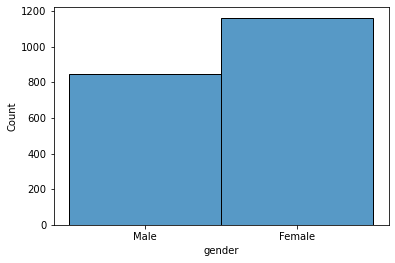

In [20]:
column_name = 'gender'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 8) body.temperature

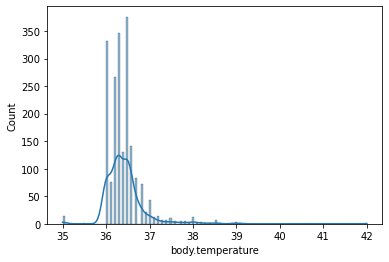

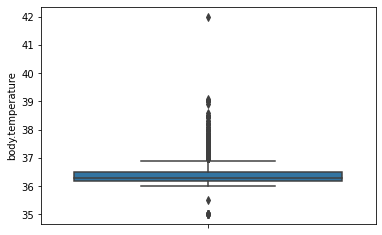

In [21]:
column_name = 'body.temperature'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

We can see there's an extreme value having body.temperature = 42, which is still a plausible value of temperature.

### 9) pulse

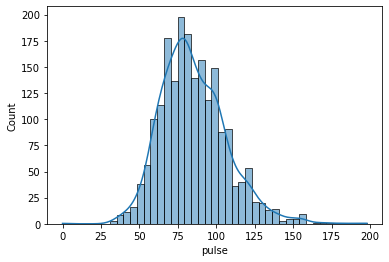

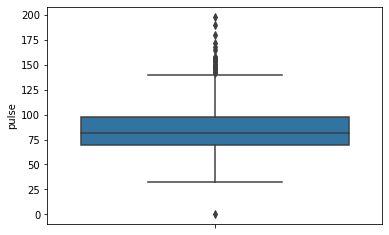

In [82]:
column_name = 'pulse'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

A value of 0 for pulse is not reasonable: we will include this value as a sentinel for a missing value. We now identify which is the patient having this mistaken value:

In [83]:
df.iloc[np.where(np.isclose(df[column_name],0))[0]]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
773886,Died,GeneralWard,Emergency,farmer,GeneralWard,1,Male,36.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(59,69]"


### 10) respiration

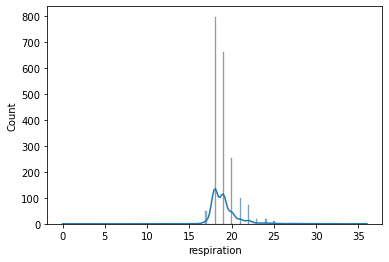

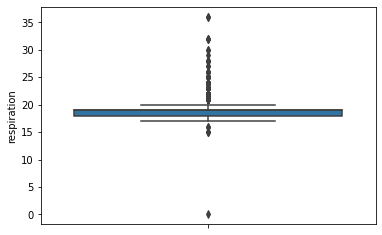

In [22]:
column_name = 'respiration'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

In [23]:
df.iloc[np.where(np.isclose(df[column_name],0))[0]]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
773886,Died,GeneralWard,Emergency,farmer,GeneralWard,1,Male,36.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(59,69]"


The problematic patient is the same as before.

### 11) systolic.blood.pressure

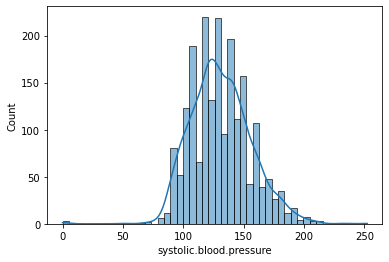

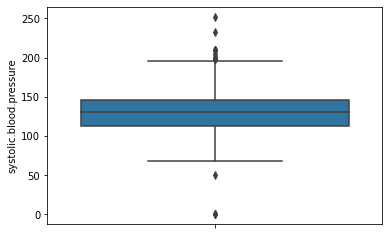

In [25]:
column_name = 'systolic.blood.pressure'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

In [26]:
df.iloc[np.where(np.isclose(df[column_name],0))[0]]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
754892,Unknown,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,78,20,...,37.0,99.0,213.0,98.3,26.2,1.04,156.0,11,1,"(79,89]"
764993,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,124,24,...,37.0,90.0,81.0,89.5,26.1,1.20,134.0,11,14,"(69,79]"
773886,Died,GeneralWard,Emergency,farmer,GeneralWard,1,Male,36.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(59,69]"


In [27]:
problematic_patients = df.iloc[np.where(np.isclose(df[column_name],0))[0]].index

In this case we have 3 patients with a wrongly reported value of 0 for systolic.blood.pressure, one of which is the same as before.

### 12) diastolic.blood.pressure

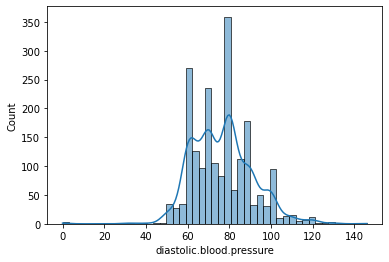

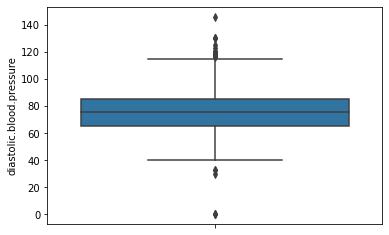

In [28]:
column_name = 'diastolic.blood.pressure'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

In [29]:
df.iloc[np.where(np.isclose(df[column_name],0))[0]]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
754892,Unknown,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,78,20,...,37.0,99.0,213.0,98.3,26.2,1.04,156.0,11,1,"(79,89]"
764993,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,124,24,...,37.0,90.0,81.0,89.5,26.1,1.20,134.0,11,14,"(69,79]"
773886,Died,GeneralWard,Emergency,farmer,GeneralWard,1,Male,36.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(59,69]"


In [30]:
np.all(df.iloc[np.where(np.isclose(df[column_name],0))[0]].index == problematic_patients)

True

Same patients as before.

### 13) map

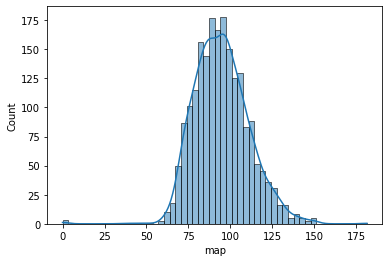

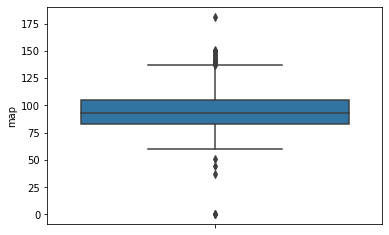

In [31]:
column_name = 'map'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

In [32]:
df.iloc[np.where(np.isclose(df[column_name],0))[0]]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
754892,Unknown,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,78,20,...,37.0,99.0,213.0,98.3,26.2,1.04,156.0,11,1,"(79,89]"
764993,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,124,24,...,37.0,90.0,81.0,89.5,26.1,1.20,134.0,11,14,"(69,79]"
773886,Died,GeneralWard,Emergency,farmer,GeneralWard,1,Male,36.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(59,69]"


In [33]:
np.all(df.iloc[np.where(np.isclose(df[column_name],0))[0]].index == problematic_patients)

True

### 14) weight

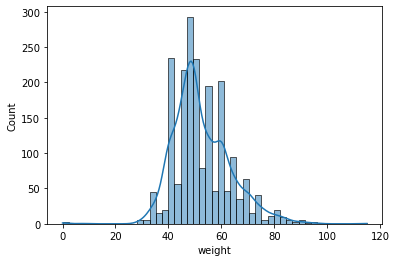

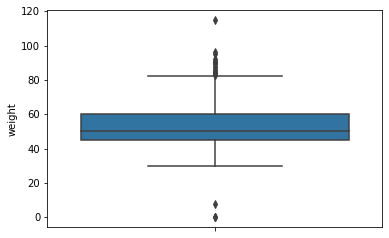

In [34]:
column_name = 'weight'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

Let's see which are the patients with anomalous weight:

In [35]:
data[column_name][data[column_name]<30]

inpatient.number
730511    0.0
785878    0.0
775572    0.0
756055    8.0
Name: weight, dtype: float64

These patients are different from those previously identified.

### 15) height

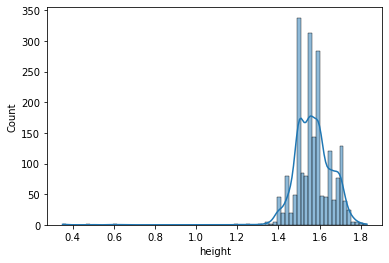

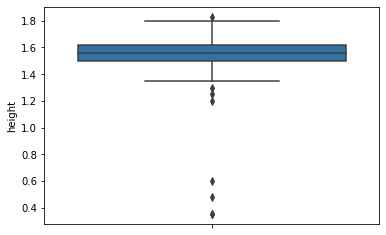

In [36]:
column_name = 'height'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

Looking on the internet people affected by dwarfism have a mean height of 1.2 meters. So we should be safe in excluding people with a height less than 1 meter, which could be an error in reporting the height (checking that they're not children from the ageCat variable).

In [37]:
data[data[column_name]<1]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
837041,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,2,Female,36.5,66,18,...,12.9,7.3,75.3,4.40,2.17,1.19,1.33,15,8,"(69,79]"
815731,Home,Cardiology,NonEmergency,farmer,Cardiology,1,Male,36.1,80,19,...,19.2,NaN,59.7,3.68,1.76,1.03,0.96,15,4,"(49,59]"
805044,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.3,100,20,...,16.1,NaN,68.4,3.73,1.80,1.04,1.07,15,6,"(59,69]"
844739,HealthcareFacility,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,62,18,...,18.5,NaN,72.8,4.93,2.82,1.56,0.99,15,8,"(79,89]"


In [38]:
data[column_name][data[column_name]<1]

inpatient.number
837041    0.48
815731    0.35
805044    0.60
844739    0.35
Name: height, dtype: float64

### 16) BMI

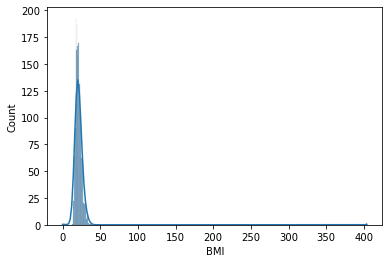

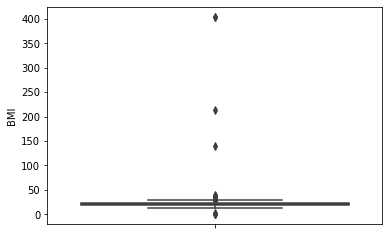

In [39]:
column_name = 'BMI'
sns.histplot(data[column_name], kde = True)
plt.show()
sns.boxplot(y = data[column_name])
plt.show()

In [40]:
data[data[column_name]>100]

,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,pulse,respiration,...,total.bilirubin,total.bile.acid,total.protein,cholesterol,low.density.lipoprotein.cholesterol,triglyceride,high.density.lipoprotein.cholesterol,GCS,dischargeDay,ageCat
inpatient.number,,,,,,,,,,,,,,,,,,,,,
837041,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,2,Female,36.5,66,18,...,12.9,7.3,75.3,4.40,2.17,1.19,1.33,15,8,"(69,79]"
815731,Home,Cardiology,NonEmergency,farmer,Cardiology,1,Male,36.1,80,19,...,19.2,NaN,59.7,3.68,1.76,1.03,0.96,15,4,"(49,59]"
805044,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.3,100,20,...,16.1,NaN,68.4,3.73,1.80,1.04,1.07,15,6,"(59,69]"
844739,HealthcareFacility,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,62,18,...,18.5,NaN,72.8,4.93,2.82,1.56,0.99,15,8,"(79,89]"


In [41]:
data['weight'][data[column_name]>100]

inpatient.number
837041    49.0
815731    49.5
805044    50.0
844739    49.5
Name: weight, dtype: float64

In [42]:
data['height'][data[column_name]>100]

inpatient.number
837041    0.48
815731    0.35
805044    0.60
844739    0.35
Name: height, dtype: float64

We can see that these patients with extreme BMI values (which usually are between 20 and 40) have triglyceride, high-density and low-density lipoprotein cholesterol and cholesterol inside their reference range. Also the weight is not large, so it's unlikely that they can be classified as obese. Finally, looking at the height, we notice that these are exactly the patients having a implausible value of height. 

### 17) type.of.heart.failure

Both     1480
Left      477
Right      51
Name: type.of.heart.failure, dtype: int64

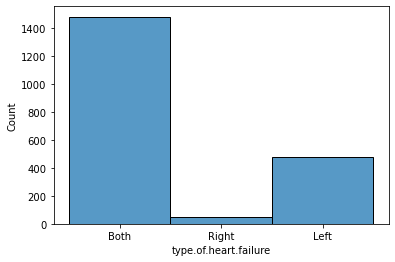

In [43]:
column_name = 'type.of.heart.failure'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 18) NYHA.cardiac.function.classification

III    1039
IV      616
II      353
Name: NYHA.cardiac.function.classification, dtype: int64

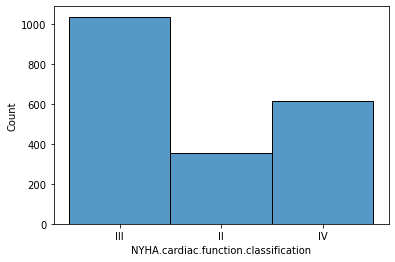

In [44]:
column_name = 'NYHA.cardiac.function.classification'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 19) Killip.grade

II     1029
I       527
III     392
IV       60
Name: Killip.grade, dtype: int64

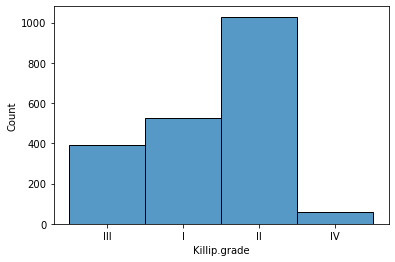

In [45]:
column_name = 'Killip.grade'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 20) myocardial.infarction

0    1865
1     143
Name: myocardial.infarction, dtype: int64

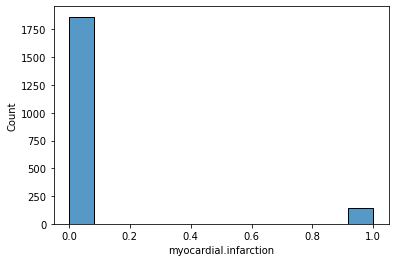

In [46]:
column_name = 'myocardial.infarction'
sns.histplot(data[column_name])

data[column_name].value_counts()

Notice that this categorical variable is very unbalanced.

### 21) congestive.heart.failure

1    1872
0     136
Name: congestive.heart.failure, dtype: int64

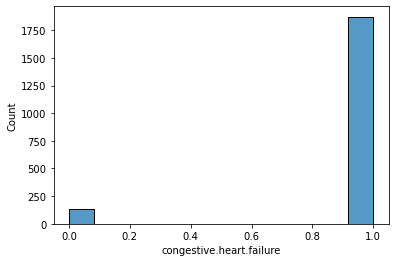

In [47]:
column_name = 'congestive.heart.failure'
sns.histplot(data[column_name])

data[column_name].value_counts()

Notice that this categorical variable is very unbalanced.

### 22) peripheral.vascular.disease

0    1907
1     101
Name: peripheral.vascular.disease, dtype: int64

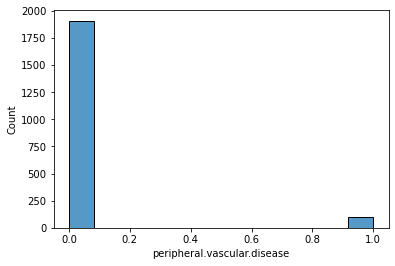

In [48]:
column_name = 'peripheral.vascular.disease'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 23) cerebrovascular.disease

0    1858
1     150
Name: cerebrovascular.disease, dtype: int64

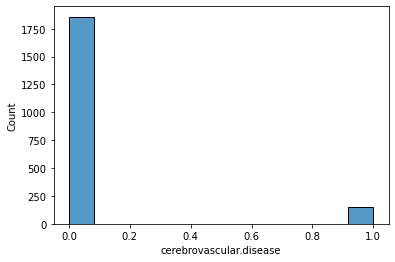

In [49]:
column_name = 'cerebrovascular.disease'
sns.histplot(data[column_name])

data[column_name].value_counts()  # unbalanced

### 24) dementia

0    1893
1     115
Name: dementia, dtype: int64

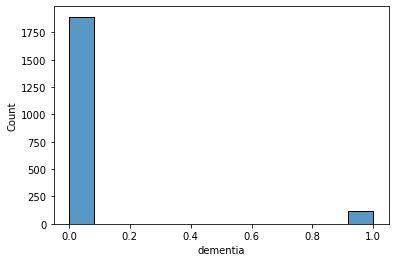

In [50]:
column_name = 'dementia'
sns.histplot(data[column_name])

data[column_name].value_counts()  # unbalanced

### 25) chronic.obstructive.pulmonary.disease

0    1775
1     233
Name: Chronic.obstructive.pulmonary.disease, dtype: int64

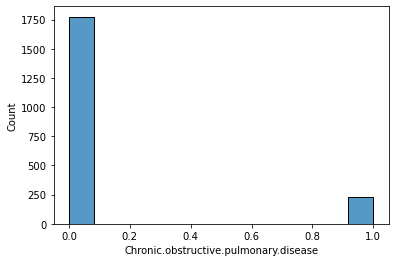

In [51]:
column_name = 'Chronic.obstructive.pulmonary.disease'
sns.histplot(data[column_name])

data[column_name].value_counts()   #unbalanced

### 26) connective.tissue.disease

0    2004
1       4
Name: connective.tissue.disease, dtype: int64

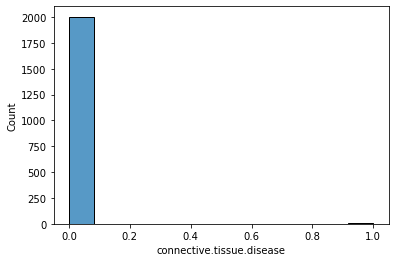

In [52]:
column_name = 'connective.tissue.disease'
sns.histplot(data[column_name])

data[column_name].value_counts()  # super unbalanced

We can think of removing this variable from the study as almost all patients do not present the disease (no variability => no help in prediction).

In [53]:
col_to_exclude = []
col_to_exclude.append(column_name)

### 27) peptic.ulcer.disease

0.0    1961
1.0      45
Name: peptic.ulcer.disease, dtype: int64

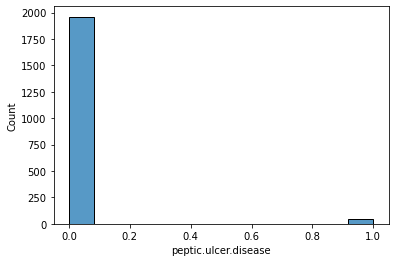

In [54]:
column_name = 'peptic.ulcer.disease'
sns.histplot(data[column_name])

data[column_name].value_counts()  # unbalanced

### 28) diabetes

0    1542
1     466
Name: diabetes, dtype: int64

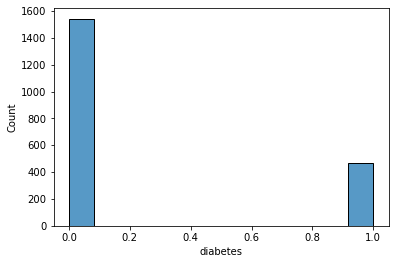

In [55]:
column_name = 'diabetes'
sns.histplot(data[column_name])

data[column_name].value_counts() # slightly unbalanced

### 29) moderate.to.severe.chronic.kidney.disease

0.0    1532
1.0     474
Name: moderate.to.severe.chronic.kidney.disease, dtype: int64

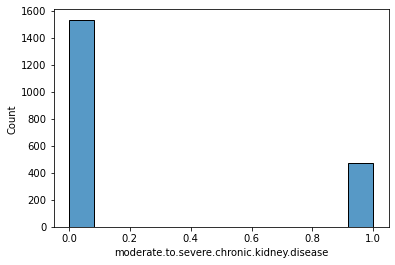

In [56]:
column_name = 'moderate.to.severe.chronic.kidney.disease'
sns.histplot(data[column_name])

data[column_name].value_counts()   # slightly unbalanced

### 30) hemiplegia

0    1996
1      12
Name: hemiplegia, dtype: int64

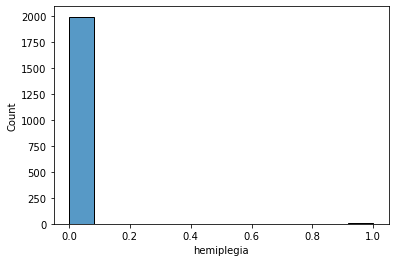

In [57]:
column_name = 'hemiplegia'
sns.histplot(data[column_name])

data[column_name].value_counts()  # super unbalanced

In [58]:
col_to_exclude.append(column_name)

### 31) leukemia

0    2008
Name: leukemia, dtype: int64

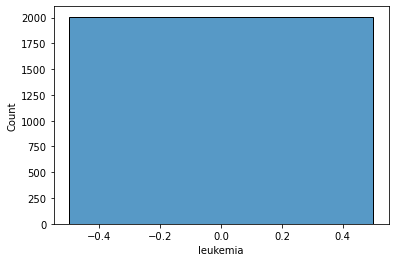

In [59]:
column_name = 'leukemia'
sns.histplot(data[column_name])

data[column_name].value_counts()

There are no patients with leukemia: we can remove this variable from the study since no variability in the feature means no help in the prediction of the values of interest.

In [60]:
col_to_exclude.append(column_name)

### 32) malignant.lymphoma

0    2007
1       1
Name: malignant.lymphoma, dtype: int64

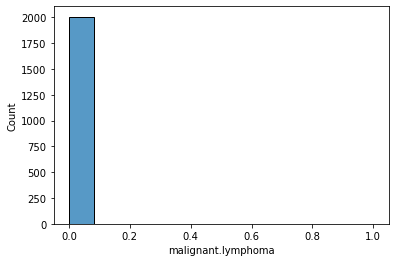

In [61]:
column_name = 'malignant.lymphoma'
sns.histplot(data[column_name])

data[column_name].value_counts()

Only one patient is affected by malignant lymphoma: no reason to include this feature in the study for the same reason as before.

In [62]:
col_to_exclude.append(column_name)

### 33) solid.tumor

0    1969
1      39
Name: solid.tumor, dtype: int64

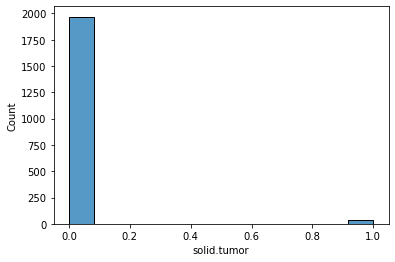

In [63]:
column_name = 'solid.tumor'
sns.histplot(data[column_name])

data[column_name].value_counts()   # unbalanced

### 34) liver.disease

0.0    1923
1.0      84
Name: liver.disease, dtype: int64

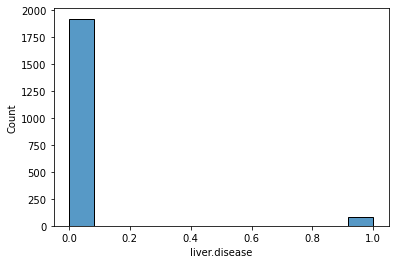

In [64]:
column_name = 'liver.disease'
sns.histplot(data[column_name])

data[column_name].value_counts() # unbalanced

### 35) AIDS

0    2004
1       4
Name: AIDS, dtype: int64

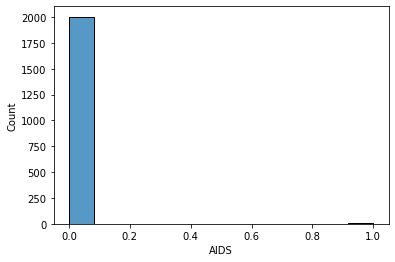

In [65]:
column_name = 'AIDS'
sns.histplot(data[column_name])

data[column_name].value_counts()  # super unbalanced

Only 4 patients affected by AIDS: no reason to include this feature in the study for the same reason as before.

In [66]:
col_to_exclude.append(column_name)

### 36) CCI.score

Charlson Comorbidity Index (CCI) predicts 10-year survival in patients with multiple comorbidities (like myocardial infarction, dementia, leukemia, AIDS, solid tumor...) keeping into account also the age of the patient.

It takes integer values. The greater is the score, the less likely the patient will survive for other 10 years.

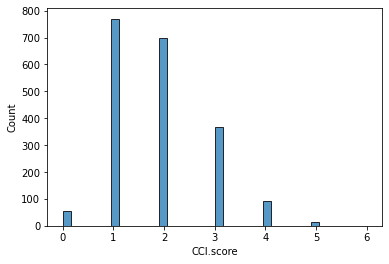

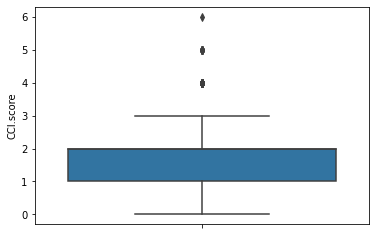

1.0    770
2.0    699
3.0    368
4.0     94
0.0     56
5.0     15
6.0      1
Name: CCI.score, dtype: int64

In [69]:
column_name = 'CCI.score'
sns.histplot(data[column_name])
plt.show()
sns.boxplot(y = data[column_name])
plt.show()
data[column_name].value_counts()

### 37) type.II.respiratory.failure

NonTypeII    1894
TypeII        114
Name: type.II.respiratory.failure, dtype: int64

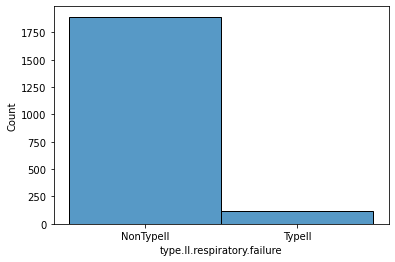

In [70]:
column_name = 'type.II.respiratory.failure'
sns.histplot(data[column_name])

data[column_name].value_counts()  # unbalanced

### 38) consciousness

Clear                1974
ResponsiveToSound      19
Nonresponsive          11
ResponsiveToPain        4
Name: consciousness, dtype: int64

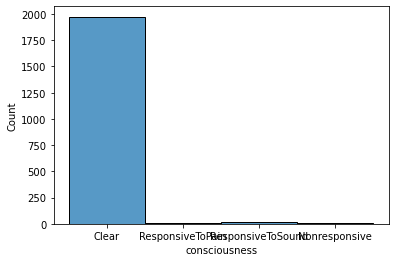

In [71]:
column_name = 'consciousness'
sns.histplot(data[column_name],)

data[column_name].value_counts()  # very unbalanced

### 39) eye.opening

4    1966
3      25
1      14
2       3
Name: eye.opening, dtype: int64

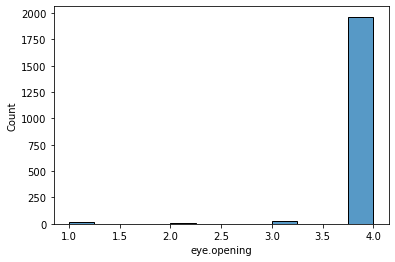

In [72]:
column_name = 'eye.opening'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 40) verbal.response

5    1964
3      18
1      14
2       8
4       4
Name: verbal.response, dtype: int64

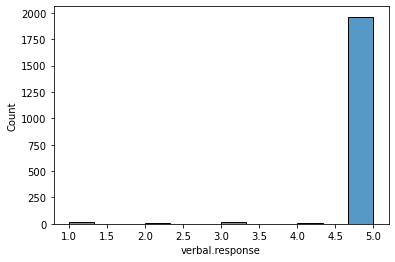

In [75]:
column_name = 'verbal.response'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 41) movement

6    1959
5      22
1      22
4       2
3       2
2       1
Name: movement, dtype: int64

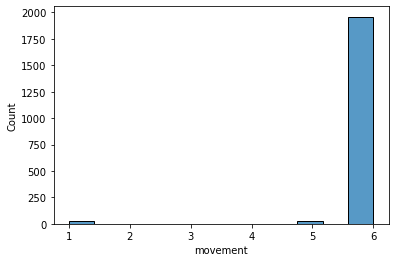

In [77]:
column_name = 'movement'
sns.histplot(data[column_name])

data[column_name].value_counts()

### 42) respiratory.support.

None    1966
IMV       25
NIMV      17
Name: respiratory.support., dtype: int64

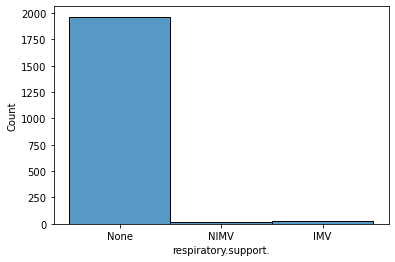

In [78]:
column_name = 'respiratory.support.'
sns.histplot(data[column_name])

data[column_name].value_counts()

We see a big imbalance: the majority of patients breath without support

### 43) oxygen.inhalation

OxygenTherapy    1898
AmbientAir        110
Name: oxygen.inhalation, dtype: int64

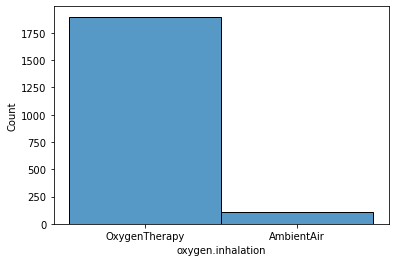

In [79]:
column_name = 'oxygen.inhalation'
sns.histplot(data[column_name])

data[column_name].value_counts()

We see a big imbalance: the majority of patients need an oxygen therapy

### 44) fio2

<AxesSubplot:xlabel='fio2', ylabel='Count'>

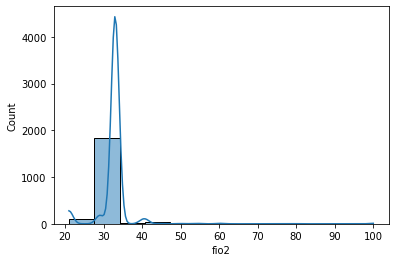

In [80]:
column_name = 'fio2'
sns.histplot(data[column_name], kde = True)

# verify values are in range with in_range function
#perc_anomalies = in_range()

#sns.boxplot(data[column_name])

<AxesSubplot:ylabel='fio2'>

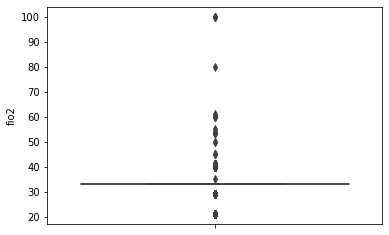

In [81]:
sns.boxplot(y = data[column_name])

There are very few people (18) with fio2>45%

### 45) acute.renal.failure

0    2001
1       7
Name: acute.renal.failure, dtype: int64

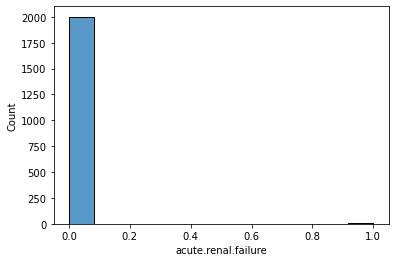

In [82]:
column_name = 'acute.renal.failure'
sns.histplot(data[column_name])

data[column_name].value_counts()

We notice a strong imbalance

In [83]:
col_to_exclude.append(column_name)

### 46) left.ventricular.end.diastolic.diameter.LV

<AxesSubplot:xlabel='left.ventricular.end.diastolic.diameter.LV', ylabel='Count'>

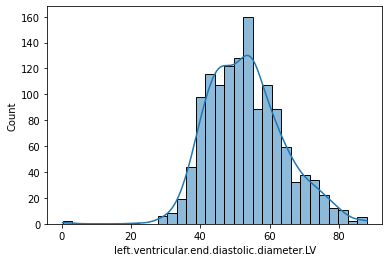

In [85]:
column_name = 'left.ventricular.end.diastolic.diameter.LV'
sns.histplot(data[column_name], kde = True)

In [86]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 3.5, 5.6)
perc_anomalies

0.6528884462151394

We notice that 65% of the patients have an out-of-range value: probably this feature will be important in our analysis (and it'll be connected to heart failure)

<AxesSubplot:ylabel='left.ventricular.end.diastolic.diameter.LV'>

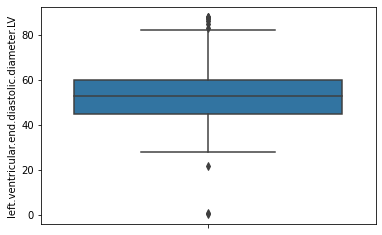

In [87]:
sns.boxplot(y = data[column_name])

Apart from the out-of-range values, we also notice some values that are physiologically impossible: some patients have 0! It is reasonable to assume that for these patients the value was not measured in the first place, so we consider the 0s as NaN

### 47) outcome.during.hospitalization

Alive                    1890
DischargeAgainstOrder     107
Dead                       11
Name: outcome.during.hospitalization, dtype: int64

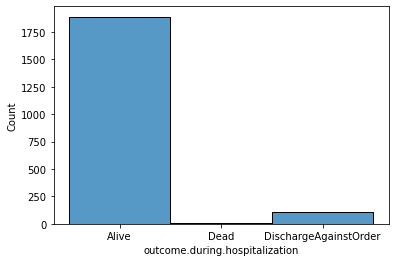

In [88]:
column_name = 'outcome.during.hospitalization'
sns.histplot(data[column_name])

data[column_name].value_counts()

(Luckily) there is a strong imbalance for the 'Alive' outcome: just a few patients get discharged against order and even less die.

### 48) death.within.28.days

0    1971
1      37
Name: death.within.28.days, dtype: int64

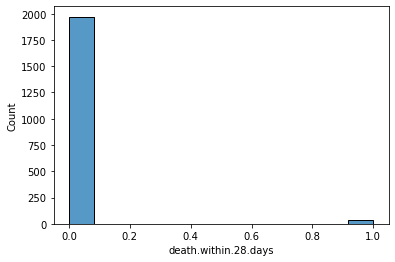

In [89]:
column_name = 'death.within.28.days'
sns.histplot(data[column_name])

data[column_name].value_counts()

(Luckily) most of the patients do not die within 28 days.

### 49) re.admission.within.28.days

0    1868
1     140
Name: re.admission.within.28.days, dtype: int64

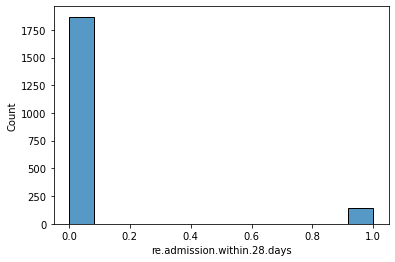

In [90]:
column_name = 're.admission.within.28.days'
sns.histplot(data[column_name])

data[column_name].value_counts()

(Luckily) most of the patients are not readmitted within 28 days.

### 50) death.within.3.months

0    1966
1      42
Name: death.within.3.months, dtype: int64

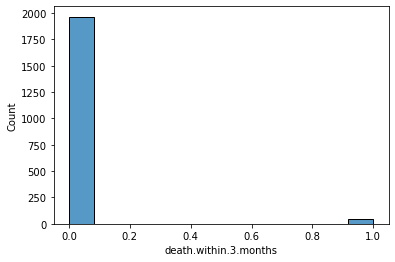

In [91]:
column_name = 'death.within.3.months'
sns.histplot(data[column_name])

data[column_name].value_counts()

(Luckily) most of the patients do not die within 3 months.

### 51) re.admission.within.3.months

0    1510
1     498
Name: re.admission.within.3.months, dtype: int64

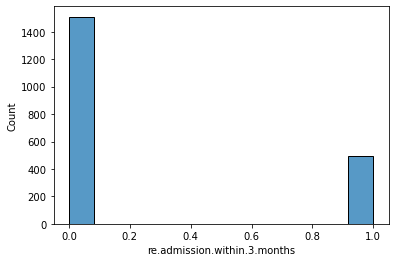

In [92]:
column_name = 're.admission.within.3.months'
sns.histplot(data[column_name])

data[column_name].value_counts()

Within 3 months the situation starts being different: the majority of the patients is still well, but about 25% of them is readmitted to the hospital.

### 52) death.within.6.months

0    1951
1      57
Name: death.within.6.months, dtype: int64

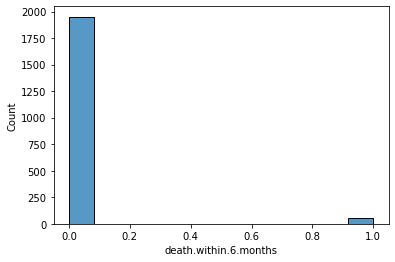

In [94]:
column_name = 'death.within.6.months'
sns.histplot(data[column_name])

data[column_name].value_counts()

(Luckily) most of the patients do not die within 6 months.

### 53) re.admission.within.6.months

0    1235
1     773
Name: re.admission.within.6.months, dtype: int64

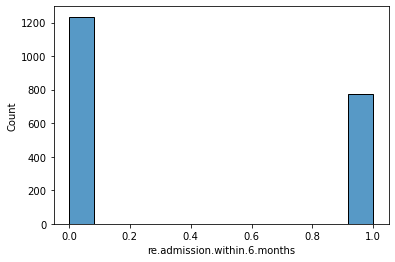

In [95]:
column_name = 're.admission.within.6.months'
sns.histplot(data[column_name])

data[column_name].value_counts()

Within 6 months a greater percentage of the patients is readmitted to the hospital.

### 54) return.to.emergency.department.within.6.months

0.0    1232
1.0     775
Name: return.to.emergency.department.within.6.months, dtype: int64

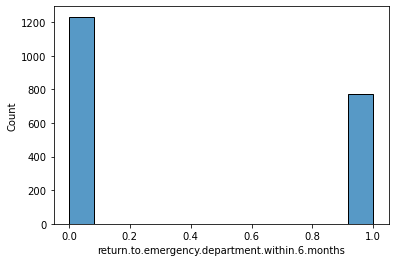

In [96]:
column_name = 'return.to.emergency.department.within.6.months'
sns.histplot(data[column_name])

data[column_name].value_counts()

A very important thing to notice is that the readmitted patients within 6 months usually go in the emergency department, and this means that their situation is very worrying.

### 55) creatinine.enzymatic.method

<AxesSubplot:xlabel='creatinine.enzymatic.method', ylabel='Count'>

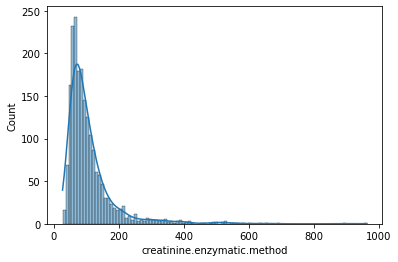

In [97]:
column_name = 'creatinine.enzymatic.method'
sns.histplot(data[column_name], kde = True)

We can see that the distribution is very skewed: a log transformation might be beneficial for the analysis. Let's look at the transformed variable.

<AxesSubplot:xlabel='creatinine.enzymatic.method', ylabel='Count'>

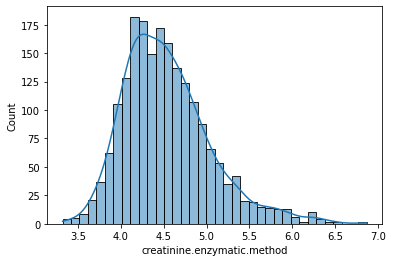

In [98]:
sns.histplot(np.log(data[column_name]), kde = True)

In [99]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 44, 110)
perc_anomalies

0.34860557768924305

A good 35% of the patients presents out-of-range values.

<AxesSubplot:ylabel='creatinine.enzymatic.method'>

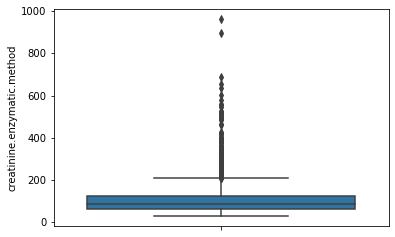

In [100]:
sns.boxplot(y = data[column_name])

### 56) urea

<AxesSubplot:xlabel='urea', ylabel='Count'>

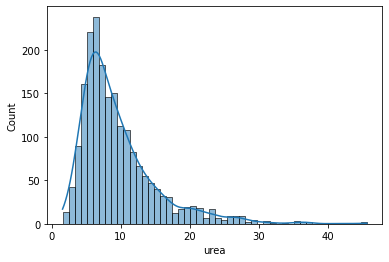

In [101]:
column_name = 'urea'
sns.histplot(data[column_name], kde = True)

<AxesSubplot:xlabel='urea', ylabel='Count'>

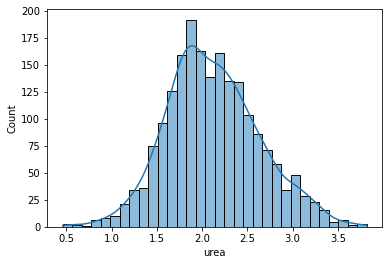

In [102]:
sns.histplot(np.log(data[column_name]), kde = True)

In [103]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 1.7, 8.3)
perc_anomalies

0.4701195219123506

We notice that almost half of the patients have an out-of-range value: probably this feature will be important in our analysis (and it'll be connected to heart failure)

<AxesSubplot:ylabel='urea'>

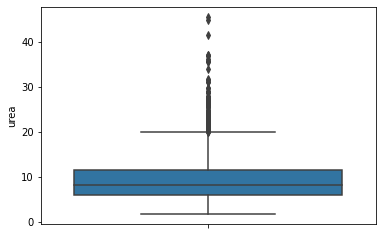

In [104]:
sns.boxplot(y = data[column_name])

From the boxplot we see that the whole distribution is shifted to higher values w.r.t. the correct range.

### 57) uric.acid

<AxesSubplot:xlabel='uric.acid', ylabel='Count'>

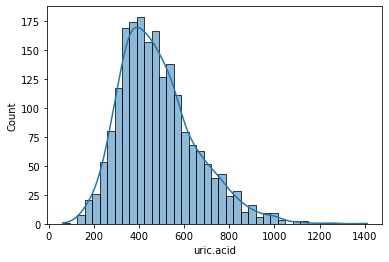

In [105]:
column_name = 'uric.acid'
sns.histplot(data[column_name], kde = True)

In [106]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 150, 440)
perc_anomalies

0.5358565737051793

We notice that more than a half of the patients have an out-of-range value: probably this feature will be important in our analysis (and it'll be connected to heart failure).

<AxesSubplot:ylabel='uric.acid'>

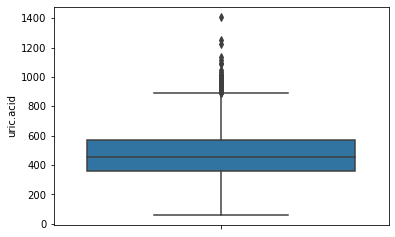

In [107]:
sns.boxplot(y = data[column_name])

From the boxplot we see that the whole distribution is shifted to higher values w.r.t. the correct range: the box results centered on the superior limit of the normal range.

### 58) glomerular.filtration.rate

<AxesSubplot:xlabel='glomerular.filtration.rate', ylabel='Count'>

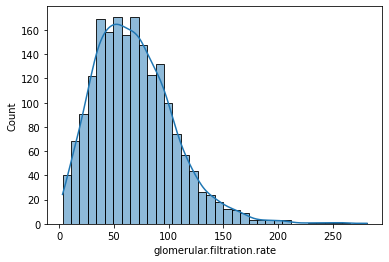

In [108]:
column_name = 'glomerular.filtration.rate'
sns.histplot(data[column_name], kde = True)

In [109]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 90, 120)
perc_anomalies

0.8037848605577689

We notice that 80% of the patients have an out-of-range value: probably this feature will be important in our analysis (and it'll be connected to heart failure).

<AxesSubplot:ylabel='glomerular.filtration.rate'>

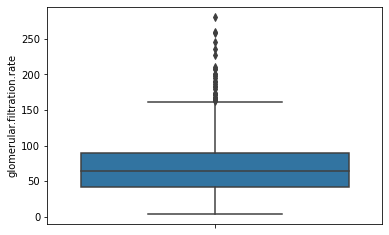

In [110]:
sns.boxplot(y = data[column_name])

In this case, from the boxplot we see that the whole distribution is shifted to lower values w.r.t. the correct range (the high values are outliers).

### 59) cystatin

<AxesSubplot:xlabel='cystatin', ylabel='Count'>

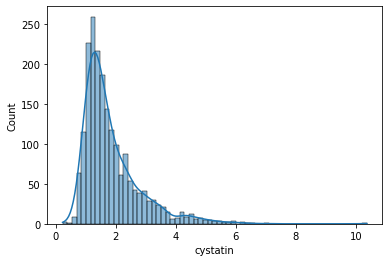

In [112]:
column_name = 'cystatin'
sns.histplot(data[column_name], kde = True)

<AxesSubplot:xlabel='cystatin', ylabel='Count'>

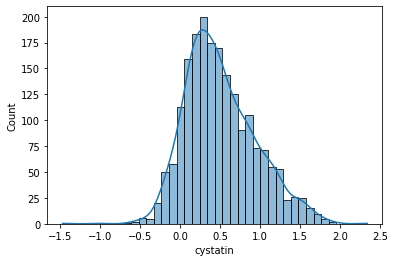

In [113]:
sns.histplot(np.log(data[column_name]), kde = True)

In [114]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.51, 0.98)
perc_anomalies

0.8924302788844621

We notice that 89% of the patients have an out-of-range value: probably this feature will be important in our analysis (and it'll be connected to heart failure).

<AxesSubplot:ylabel='cystatin'>

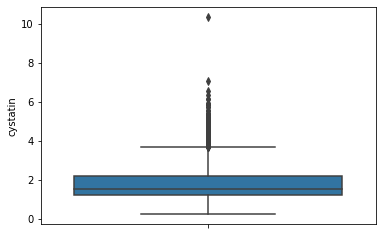

In [115]:
sns.boxplot(y = data[column_name])

From the boxplot we see that the whole distribution is shifted to much higher values w.r.t. the correct range.

### 60) white.blood.cell

<AxesSubplot:xlabel='white.blood.cell', ylabel='Count'>

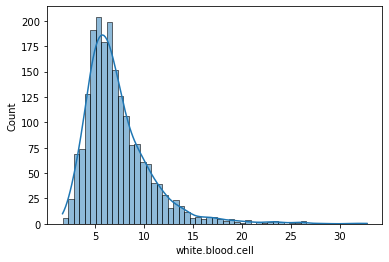

In [116]:
column_name = 'white.blood.cell'
sns.histplot(data[column_name], kde = True)

<AxesSubplot:xlabel='white.blood.cell', ylabel='Count'>

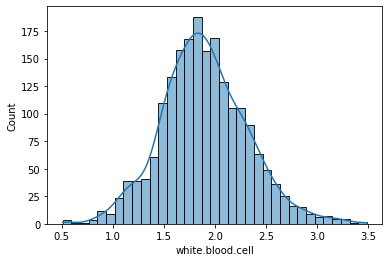

In [117]:
sns.histplot(np.log(data[column_name]), kde = True)

In [118]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 4, 10)
perc_anomalies

0.25249003984063745

A 25% of the patients presents out-of-range values.

<AxesSubplot:ylabel='white.blood.cell'>

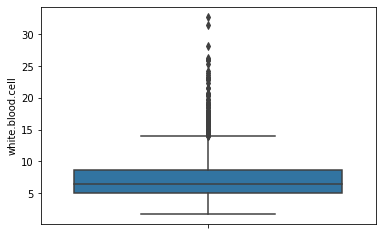

In [119]:
sns.boxplot(y = data[column_name])

We notice from the boxplot that the distribution corresponds quite well with the correct range, but we have some high outliers.

### 61) monocyte.ratio

<AxesSubplot:xlabel='monocyte.ratio', ylabel='Count'>

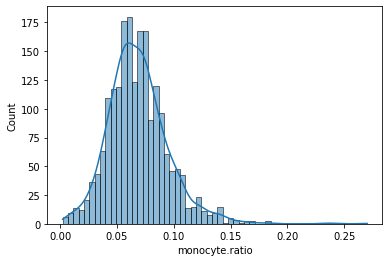

In [120]:
column_name = 'monocyte.ratio'
sns.histplot(data[column_name], kde = True)

In [121]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.03, 0.114)
perc_anomalies

0.09312749003984064

We notice that 98% of the patients have an out-of-range value: probably this feature will be important in our analysis (and it'll be connected to heart failure).

<AxesSubplot:ylabel='monocyte.ratio'>

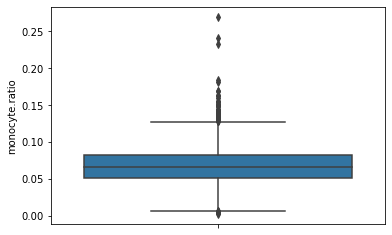

In [122]:
sns.boxplot(y = data[column_name])

In this case, from the boxplot we see that the whole distribution is shifted to lower values w.r.t. the correct range (the high values are outliers).

### 62) monocyte.count

<AxesSubplot:xlabel='monocyte.count', ylabel='Count'>

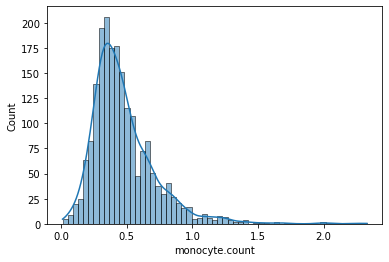

In [123]:
column_name = 'monocyte.count'
sns.histplot(data[column_name], kde = True)

In [124]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.2, 0.8)
perc_anomalies

0.1394422310756972

<AxesSubplot:ylabel='monocyte.count'>

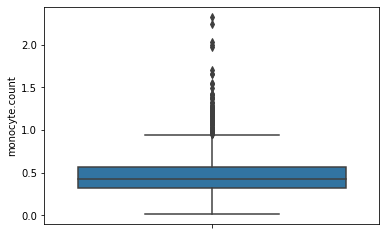

In [125]:
sns.boxplot(y = data[column_name])

Quite ok, but with many high outliers.

### 63) red.blood.cell

<AxesSubplot:xlabel='red.blood.cell', ylabel='Count'>

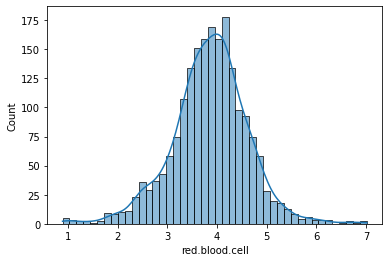

In [126]:
column_name = 'red.blood.cell'
sns.histplot(data[column_name], kde = True)

In [127]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 3.5, 5.5)
perc_anomalies

0.2918326693227092

<AxesSubplot:ylabel='red.blood.cell'>

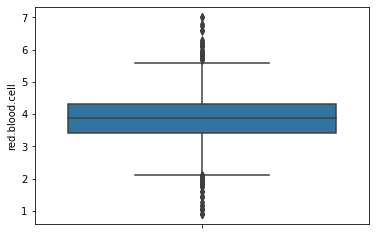

In [128]:
sns.boxplot(y = data[column_name])

There are outliers, but the distribution is well into the correct range.

### 64) coefficient.of.variation.of.red.blood.cell.distribution.width

<AxesSubplot:xlabel='coefficient.of.variation.of.red.blood.cell.distribution.width', ylabel='Count'>

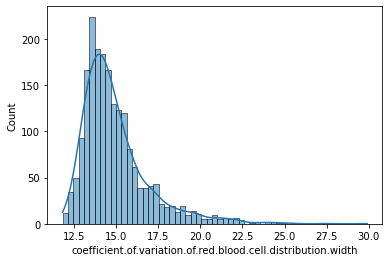

In [129]:
column_name = 'coefficient.of.variation.of.red.blood.cell.distribution.width'
sns.histplot(data[column_name], kde = True)

In [130]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0, 15)
perc_anomalies

0.33615537848605576

There is a 34% of patients which have a higher value.

<AxesSubplot:ylabel='coefficient.of.variation.of.red.blood.cell.distribution.width'>

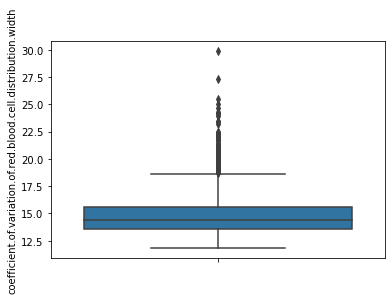

In [131]:
sns.boxplot(y = data[column_name])

### 65) standard.deviation.of.red.blood.cell.distribution.width

<AxesSubplot:xlabel='standard.deviation.of.red.blood.cell.distribution.width', ylabel='Count'>

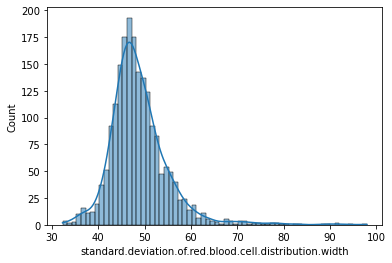

In [132]:
column_name = 'standard.deviation.of.red.blood.cell.distribution.width'
sns.histplot(data[column_name], kde = True)

In [133]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 40, 53)
perc_anomalies

0.21364541832669323

We only have a few patients (21%) with out-of-range values: probably it isn't a feature of great importance.

<AxesSubplot:ylabel='standard.deviation.of.red.blood.cell.distribution.width'>

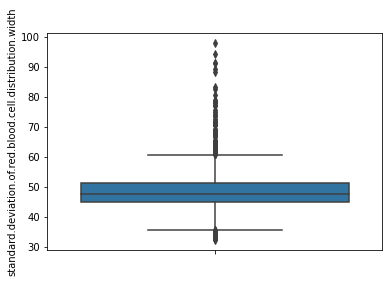

In [134]:
sns.boxplot(y = data[column_name])

### 66) mean.corpuscular.volume

<AxesSubplot:xlabel='mean.corpuscular.volume', ylabel='Count'>

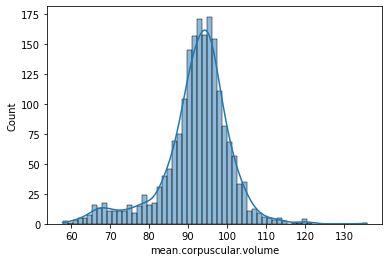

In [135]:
column_name = 'mean.corpuscular.volume'
sns.histplot(data[column_name], kde = True)

In [136]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 82, 96)
perc_anomalies

0.4113545816733068

Here we have a lot of anomalies (41%), signaling a possible relevance of this feature.

<AxesSubplot:ylabel='mean.corpuscular.volume'>

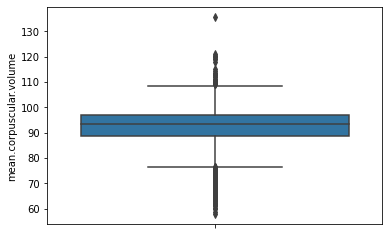

In [137]:
sns.boxplot(y = data[column_name])

### 67) hematocrit

<AxesSubplot:xlabel='hematocrit', ylabel='Count'>

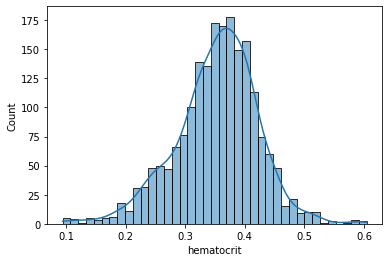

In [138]:
column_name = 'hematocrit'
sns.histplot(data[column_name], kde = True)

In [139]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.35, 0.50)
perc_anomalies

0.44123505976095617

A good 44% of the patients is out-of-range, so this variable will probably be relevant.

<AxesSubplot:ylabel='hematocrit'>

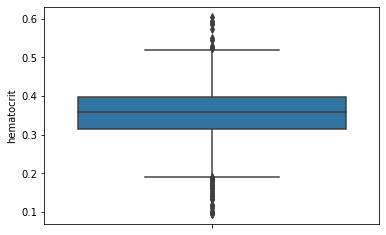

In [140]:
sns.boxplot(y = data[column_name])

### 68) lymphocyte.count

<AxesSubplot:xlabel='lymphocyte.count', ylabel='Count'>

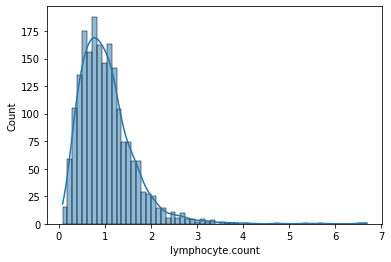

In [141]:
column_name = 'lymphocyte.count'
sns.histplot(data[column_name], kde = True)

<AxesSubplot:xlabel='lymphocyte.count', ylabel='Count'>

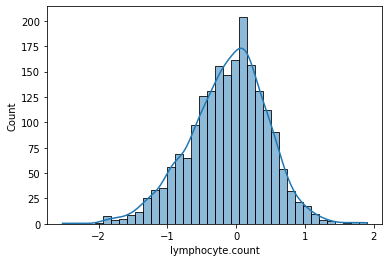

In [142]:
sns.histplot(np.log(data[column_name]), kde = True)

In [143]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.8, 4)
perc_anomalies

0.38695219123505975

We notice that the distribution is centered in 1 and that many patients have a value lower than 0.8. The ones with a value greater than 4, instead, are just a few. In general, however, 38% of the patients are out-of-range.

<AxesSubplot:ylabel='lymphocyte.count'>

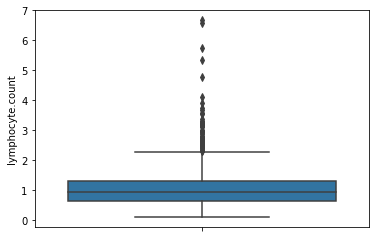

In [144]:
sns.boxplot(y = data[column_name])

The patients with a high value are outliers.

### 69) mean.hemoglobin.volume

<AxesSubplot:xlabel='mean.hemoglobin.volume', ylabel='Count'>

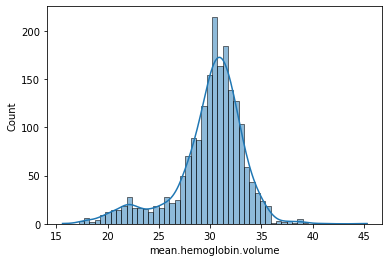

In [145]:
column_name = 'mean.hemoglobin.volume'
sns.histplot(data[column_name], kde = True)

In [146]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 27, 35)
perc_anomalies

0.16284860557768924

Just a few anomalies that we can consider as outliers.

<AxesSubplot:ylabel='mean.hemoglobin.volume'>

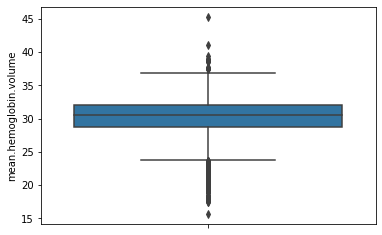

In [147]:
sns.boxplot(y = data[column_name])

### 70) mean.hemoglobin.concentration

<AxesSubplot:xlabel='mean.hemoglobin.concentration', ylabel='Count'>

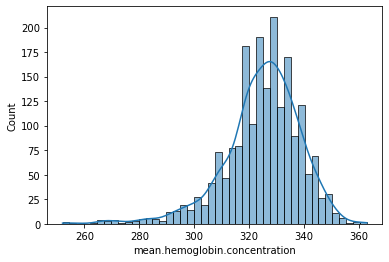

In [148]:
column_name = 'mean.hemoglobin.concentration'
sns.histplot(data[column_name], kde = True)

In [149]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 320, 360)
perc_anomalies

0.2848605577689243

We have just a 28% of anomalies. Almost all of them are lower than the right range.

<AxesSubplot:ylabel='mean.hemoglobin.concentration'>

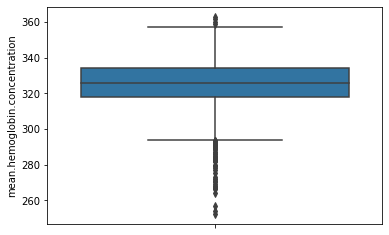

In [150]:
sns.boxplot(y = data[column_name])

### 71) mean.platelet.volume

<AxesSubplot:xlabel='mean.platelet.volume', ylabel='Count'>

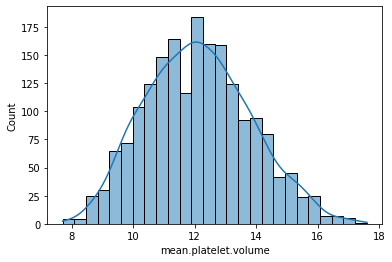

In [151]:
column_name = 'mean.platelet.volume'
sns.histplot(data[column_name], kde = True)

In [152]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 6.5, 12)
perc_anomalies

0.475597609561753

Almost half (47%) of the patients have a higher value out-of-range. This can signify that this feature might be relevant.

<AxesSubplot:ylabel='mean.platelet.volume'>

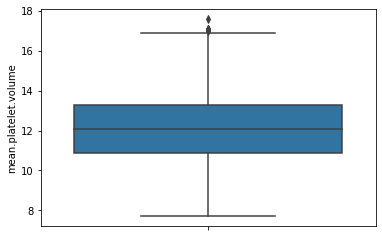

In [153]:
sns.boxplot(y = data[column_name])

### 72) basophil.ratio

<AxesSubplot:xlabel='basophil.ratio', ylabel='Count'>

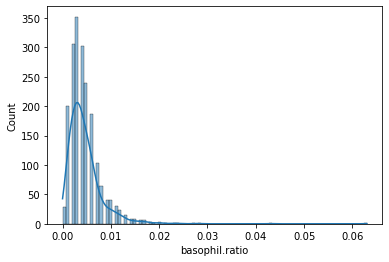

In [154]:
column_name = 'basophil.ratio'
sns.histplot(data[column_name], kde = True)

In [155]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0, 1)
perc_anomalies

0.0

<AxesSubplot:ylabel='basophil.ratio'>

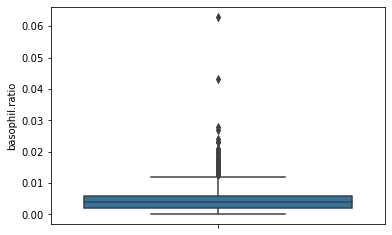

In [156]:
sns.boxplot(y = data[column_name])

In [157]:
np.where(data[column_name] == data[column_name].max())

(array([1221], dtype=int64),)

All the patients have very low values (but in range).

### 73) basophil.count

<AxesSubplot:xlabel='basophil.count', ylabel='Count'>

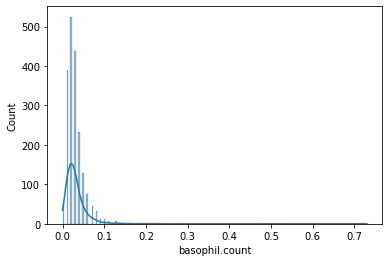

In [158]:
column_name = 'basophil.count'
sns.histplot(data[column_name], kde = True)

In [159]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0, 0.1)
perc_anomalies

0.01743027888446215

<AxesSubplot:ylabel='basophil.count'>

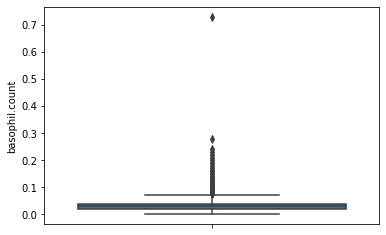

In [160]:
sns.boxplot(y = data[column_name])

All the patients have very low values (but in range).

In [161]:
np.where(data[column_name] == data[column_name].max())

(array([1221], dtype=int64),)

### 74) eosinophil.ratio

<AxesSubplot:xlabel='eosinophil.ratio', ylabel='Count'>

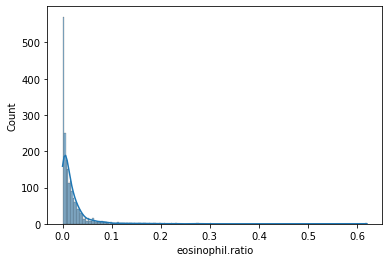

In [162]:
column_name = 'eosinophil.ratio'
sns.histplot(data[column_name], kde = True)

In [163]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.005, 0.05) 
perc_anomalies

0.4118525896414343

<AxesSubplot:ylabel='eosinophil.ratio'>

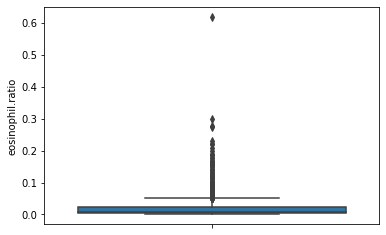

In [164]:
sns.boxplot(y = data[column_name])

In [165]:
np.where(data[column_name] == data[column_name].max())

(array([430], dtype=int64),)

### 75) eosinophil.count

<AxesSubplot:xlabel='eosinophil.count', ylabel='Count'>

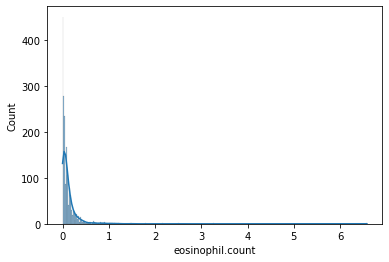

In [166]:
column_name = 'eosinophil.count'
sns.histplot(data[column_name], kde = True)

In [167]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.02, 0.5) 
perc_anomalies

0.25697211155378485

We have a 25% of anomalies.

<AxesSubplot:ylabel='eosinophil.count'>

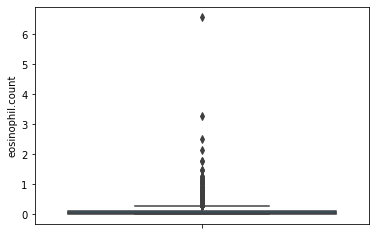

In [168]:
sns.boxplot(y = data[column_name])

There are some outliers a lot higher than the correct range.

In [169]:
np.where(data[column_name] == data[column_name].max())

(array([430], dtype=int64),)

As expected, they have the same outlying value.

### 76) hemoglobin

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

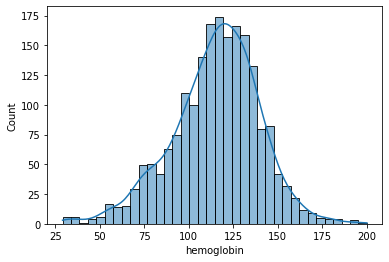

In [170]:
column_name = 'hemoglobin'
sns.histplot(data[column_name], kde = True)

In [171]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 110, 160) 
perc_anomalies

0.38247011952191234

We notice a good 38% of patients with out-of-range values

<AxesSubplot:ylabel='hemoglobin'>

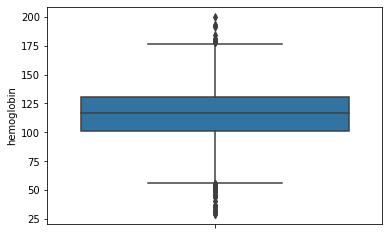

In [172]:
sns.boxplot(y = data[column_name])

### 77) platelet

<AxesSubplot:xlabel='platelet', ylabel='Count'>

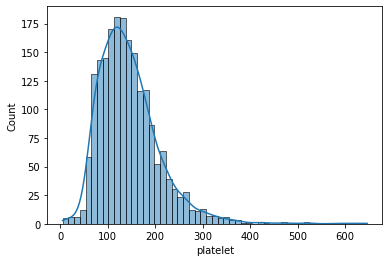

In [173]:
column_name = 'platelet'
sns.histplot(data[column_name], kde = True)

In [174]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 100, 300) 
perc_anomalies

0.26095617529880477

We have 26% of patients with anomalies.

<AxesSubplot:ylabel='platelet'>

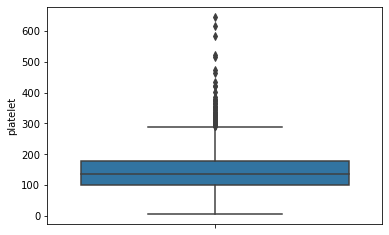

In [175]:
sns.boxplot(y = data[column_name])

The distribution is quite good: it is centered in the correct range, then there are outliers.

### 78) platelet.distribution.width

<AxesSubplot:xlabel='platelet.distribution.width', ylabel='Count'>

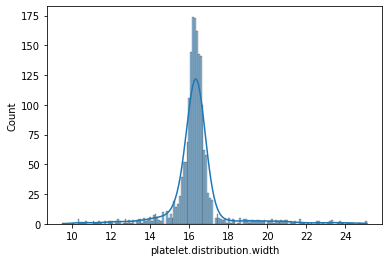

In [176]:
column_name = 'platelet.distribution.width'
sns.histplot(data[column_name], kde = True)

In [177]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 9, 17) 
perc_anomalies

0.09362549800796813

<AxesSubplot:ylabel='platelet.distribution.width'>

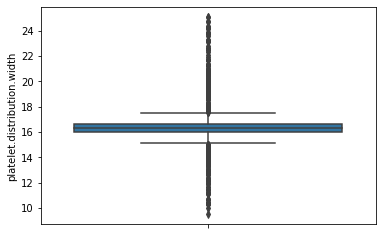

In [178]:
sns.boxplot(y = data[column_name])

The box is centered on the higher part of the range. This means that the patients tend to have a high value but within the range (high out-of-range values are just a few). 

### 79) platelet.hematocrit

<AxesSubplot:xlabel='platelet.hematocrit', ylabel='Count'>

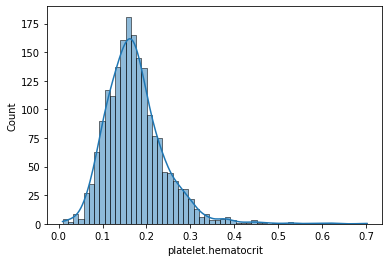

In [180]:
column_name = 'platelet.hematocrit'
sns.histplot(data[column_name], kde = True)

In [181]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.108, 0.282) 
perc_anomalies

0.18376494023904383

<AxesSubplot:ylabel='platelet.hematocrit'>

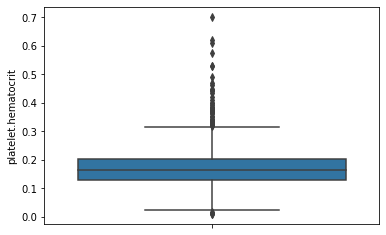

In [182]:
sns.boxplot(y = data[column_name])

There are some high outliers.

### 80) neutrophil.ratio

<AxesSubplot:xlabel='neutrophil.ratio', ylabel='Count'>

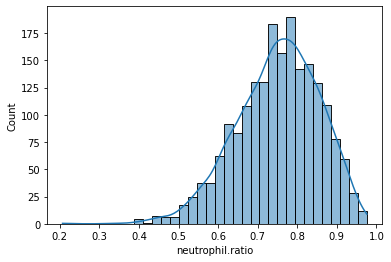

In [183]:
column_name = 'neutrophil.ratio'
sns.histplot(data[column_name], kde = True)

In [184]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 0.5, 0.7) 
perc_anomalies

0.7056772908366534

We have a lot of anomalies (70%): the distribution itself is centered on higher values than the superior extreme of the range.

<AxesSubplot:ylabel='neutrophil.ratio'>

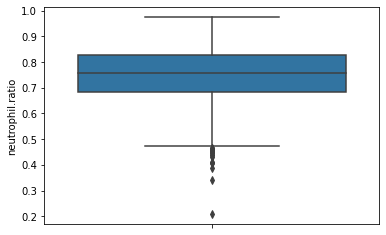

In [185]:
sns.boxplot(y = data[column_name])

Moreover, we have also some low outliers.

### 81) neutrophil.count

<AxesSubplot:xlabel='neutrophil.count', ylabel='Count'>

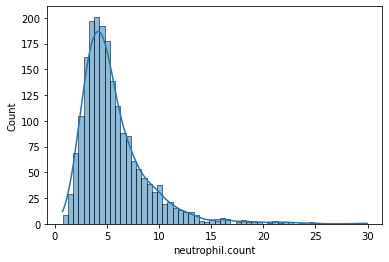

In [186]:
column_name = 'neutrophil.count'
sns.histplot(data[column_name], kde = True)

<AxesSubplot:xlabel='neutrophil.count', ylabel='Count'>

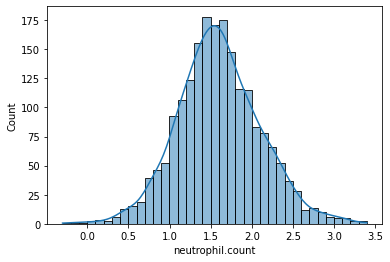

In [187]:
sns.histplot(np.log(data[column_name]), kde = True)

In [188]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name], 2, 7) 
perc_anomalies

0.26095617529880477

26% of the patients have out-of-range values.

<AxesSubplot:ylabel='neutrophil.count'>

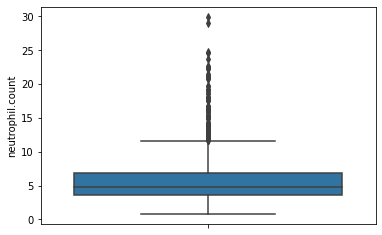

In [189]:
sns.boxplot(y = data[column_name])

These out-of-range values are all higher than normal.

### 82) D.dimer

<AxesSubplot:xlabel='D.dimer', ylabel='Count'>

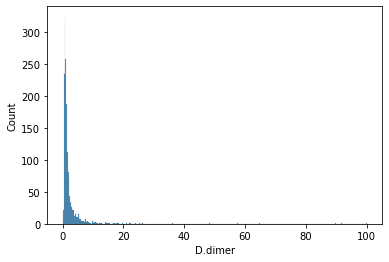

In [190]:
column_name = "D.dimer"
sns.histplot(data[column_name])

In [191]:
# verify values are in range with in_range function
perc_anomalies = in_range(data[column_name],0,0.55)
perc_anomalies 

0.8615537848605578

There is a 86% of out of range values

<AxesSubplot:ylabel='D.dimer'>

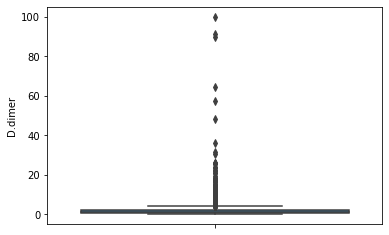

In [192]:
sns.boxplot(y=data[column_name])

There are outliers

### 83) international.normalized.ratio

<AxesSubplot:xlabel='international.normalized.ratio', ylabel='Count'>

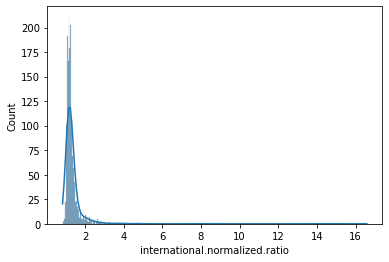

In [193]:
column_name = "international.normalized.ratio"
sns.histplot(data[column_name],kde = True)

<AxesSubplot:xlabel='international.normalized.ratio', ylabel='Count'>

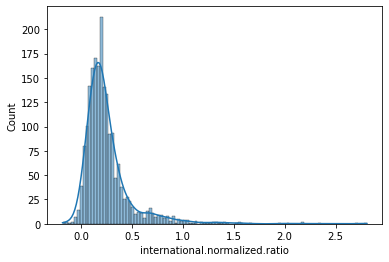

In [194]:
sns.histplot(np.log(data[column_name]),kde = True)

In [195]:
perc_anomalies = in_range(data[column_name],0.8,1.5)
perc_anomalies 

0.1344621513944223

<AxesSubplot:ylabel='international.normalized.ratio'>

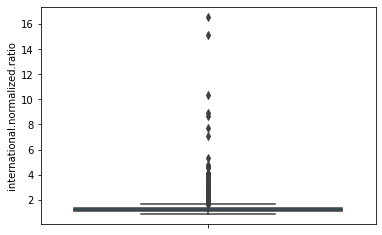

In [196]:
sns.boxplot(y=data[column_name])

The outliers are:

In [197]:
data[data[column_name]>14].index.tolist()

[852904, 855364]

### 84) activated.partial.thromboplastin.time

<AxesSubplot:xlabel='activated.partial.thromboplastin.time', ylabel='Count'>

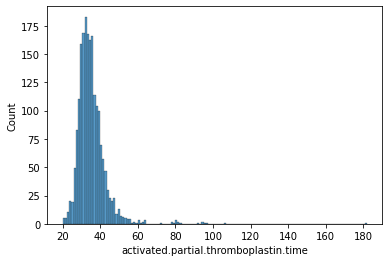

In [198]:
column_name = 'activated.partial.thromboplastin.time'
sns.histplot(data[column_name])

<AxesSubplot:xlabel='activated.partial.thromboplastin.time', ylabel='Count'>

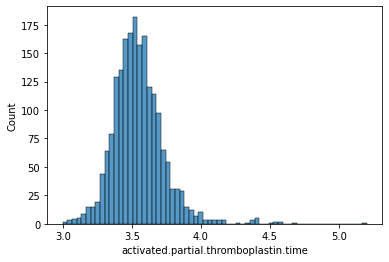

In [199]:
sns.histplot(np.log(data[column_name]))

In [200]:
perc_anomalies = in_range(data[column_name],20,40)
perc_anomalies

0.16832669322709162

<AxesSubplot:ylabel='activated.partial.thromboplastin.time'>

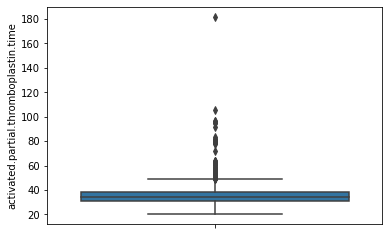

In [201]:
sns.boxplot(y=data[column_name])

The outlier is:

In [202]:
data[data[column_name]>140].index.tolist()

[847822]

### 85) thrombin.time

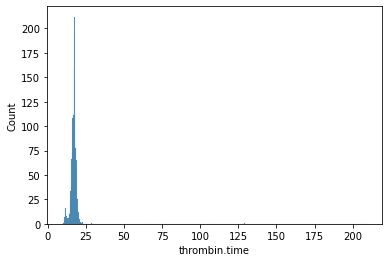

In [203]:
column_name = 'thrombin.time'
sns.histplot(data[column_name])
plt.show()

In [204]:
perc_anomalies = in_range(data[column_name],14,21)
perc_anomalies

0.06374501992031872

<AxesSubplot:ylabel='thrombin.time'>

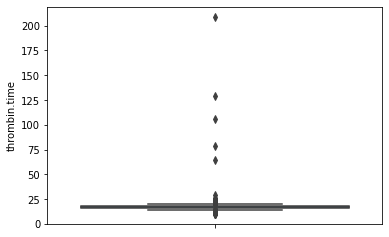

In [205]:
sns.boxplot(y=data[column_name])

The outlier is:

In [206]:
data[data[column_name]>175].index.tolist()

[847822]

### 86) prothrombin.activity

<AxesSubplot:xlabel='prothrombin.activity', ylabel='Count'>

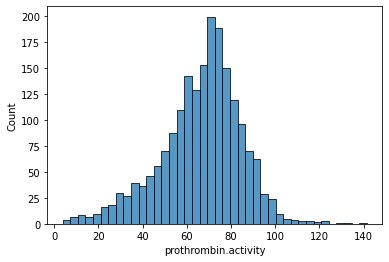

In [207]:
column_name = 'prothrombin.activity'
sns.histplot(data[column_name])

In [208]:
perc_anomalies = in_range(data[column_name],70,120)
perc_anomalies

0.5204183266932271

<AxesSubplot:ylabel='prothrombin.activity'>

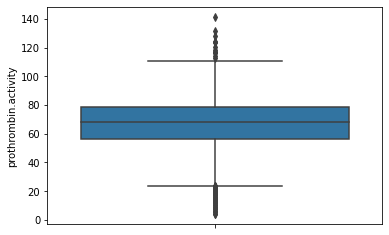

In [62]:
sns.boxplot(y=data[column_name])


We observe that there is a group of patients with higher values prothrombin.activity and a group with smaller values.

### 87) prothrombin.time.ratio

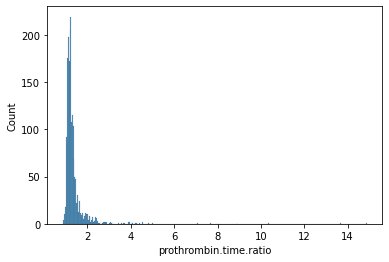

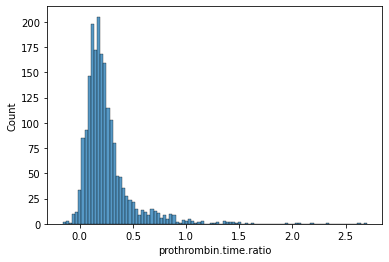

In [209]:
column_name = 'prothrombin.time.ratio'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

<AxesSubplot:ylabel='prothrombin.time.ratio'>

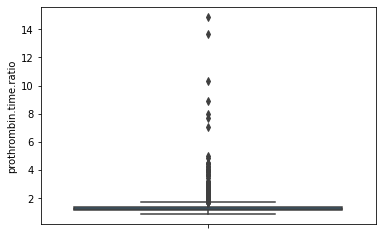

In [210]:
sns.boxplot(y=data[column_name])

The outliers are:

In [66]:
data[data[column_name]>12].index.tolist()

[852904, 855364]

### 88) fibrinogen

<AxesSubplot:xlabel='fibrinogen', ylabel='Count'>

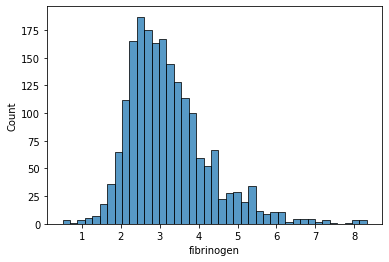

In [211]:
column_name = 'fibrinogen'
sns.histplot(data[column_name])

In [212]:
perc_anomalies = in_range(data[column_name],2,4)
perc_anomalies

0.23207171314741035

<AxesSubplot:ylabel='fibrinogen'>

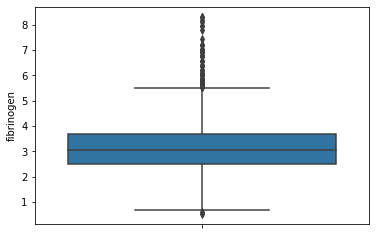

In [213]:
sns.boxplot(y=data[column_name])

### 89) high.sensitivity.troponin

<AxesSubplot:xlabel='high.sensitivity.troponin', ylabel='Count'>

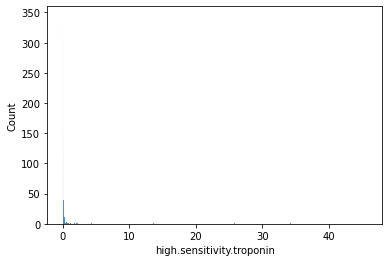

In [214]:
column_name = 'high.sensitivity.troponin'
sns.histplot(data[column_name])

<AxesSubplot:xlabel='high.sensitivity.troponin', ylabel='Count'>

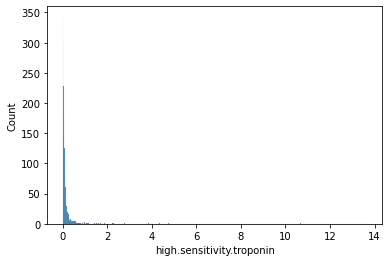

In [215]:
sns.histplot(data[column_name][data[column_name]<14])

In [216]:
perc_anomalies = in_range(data[column_name],0,14)
perc_anomalies

0.00298804780876494

<AxesSubplot:ylabel='high.sensitivity.troponin'>

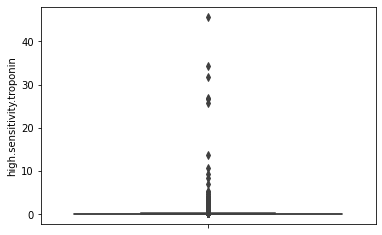

In [217]:
sns.boxplot(y=data[column_name])

The outlier is:

In [218]:
data[data[column_name]>40].index.tolist()

[789355]

### 90) carbon.dioxide.binding.capacity

<AxesSubplot:xlabel='carbon.dioxide.binding.capacity', ylabel='Count'>

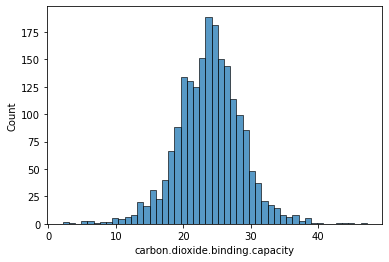

In [320]:
column_name = 'carbon.dioxide.binding.capacity'
sns.histplot(data[column_name])

In [321]:
perc_anomalies = in_range(data[column_name], 22, 20)
perc_anomalies

0.9945219123505976

<AxesSubplot:ylabel='carbon.dioxide.binding.capacity'>

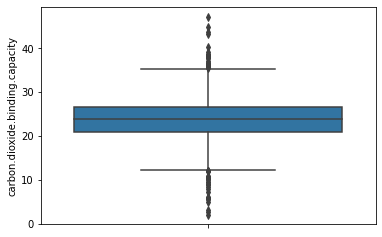

In [322]:
sns.boxplot(y=data[column_name])

### 91) calcium

<AxesSubplot:xlabel='calcium', ylabel='Count'>

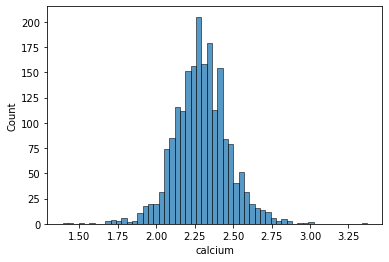

In [219]:
column_name = 'calcium'
sns.histplot(data[column_name])

In [220]:
perc_anomalies = in_range(data[column_name],2.11,2.52)
perc_anomalies

0.21713147410358566

<AxesSubplot:ylabel='calcium'>

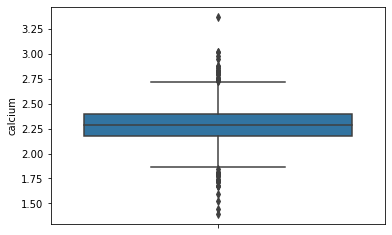

In [221]:
sns.boxplot(y=data[column_name])

### 92) potassium

<AxesSubplot:xlabel='potassium', ylabel='Count'>

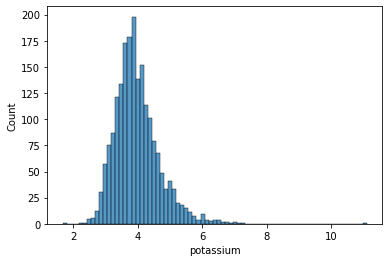

In [222]:
column_name = 'potassium'
sns.histplot(data[column_name])

In [223]:
perc_anomalies = in_range(data[column_name],3.5,5.3)
perc_anomalies

0.27589641434262946

<AxesSubplot:ylabel='potassium'>

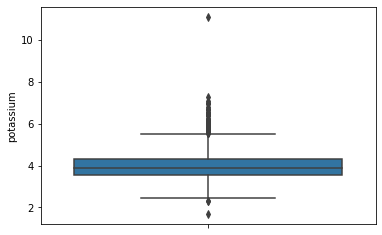

In [224]:
sns.boxplot(y=data[column_name])

The outlier is:

In [225]:
data[data[column_name]>10].index.tolist()

[867601]

### 93) chloride

<AxesSubplot:xlabel='chloride', ylabel='Count'>

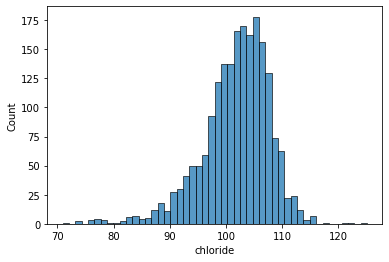

In [226]:
column_name = 'chloride'
sns.histplot(data[column_name])

In [227]:
perc_anomalies = in_range(data[column_name],99,110)
perc_anomalies

0.300796812749004

<AxesSubplot:ylabel='chloride'>

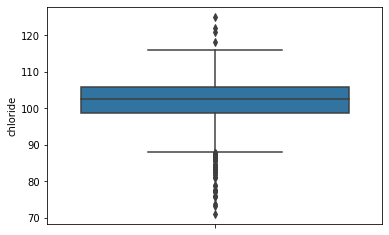

In [228]:
sns.boxplot(y=data[column_name])

### 94) sodium

<AxesSubplot:xlabel='sodium', ylabel='Count'>

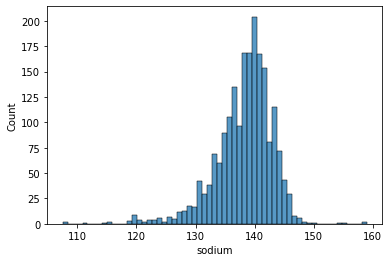

In [229]:
column_name = 'sodium'
sns.histplot(data[column_name])

In [230]:
perc_anomalies = in_range(data[column_name],137,147)
perc_anomalies

0.32270916334661354

<AxesSubplot:ylabel='sodium'>

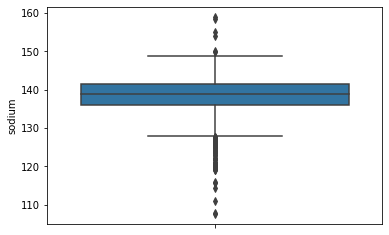

In [231]:
sns.boxplot(y=data[column_name])

### 95) creatine.kinase.isoenzyme.to.creatine.kinase

<AxesSubplot:xlabel='creatine.kinase.isoenzyme.to.creatine.kinase', ylabel='Count'>

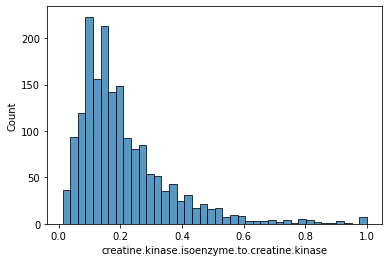

In [323]:
column_name = 'creatine.kinase.isoenzyme.to.creatine.kinase'
sns.histplot(data[column_name])

In [324]:
perc_anomalies = in_range(data[column_name],0, 0.05)
perc_anomalies

0.8351593625498008

<AxesSubplot:ylabel='creatine.kinase.isoenzyme.to.creatine.kinase'>

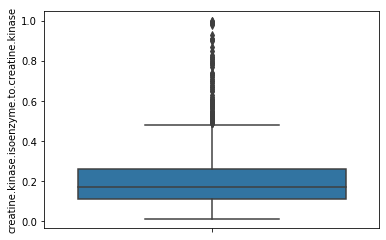

In [325]:
sns.boxplot(y=data[column_name])

### 96) hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase

<AxesSubplot:xlabel='hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase', ylabel='Count'>

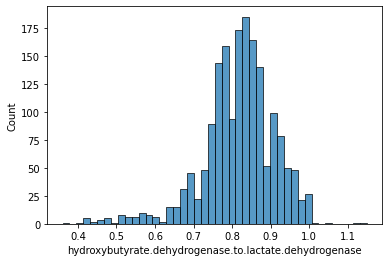

In [232]:
column_name = 'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase'
sns.histplot(data[column_name])

In [233]:
perc_anomalies = in_range(data[column_name],0.2,0.8)
perc_anomalies

0.5184262948207171

<AxesSubplot:ylabel='hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase'>

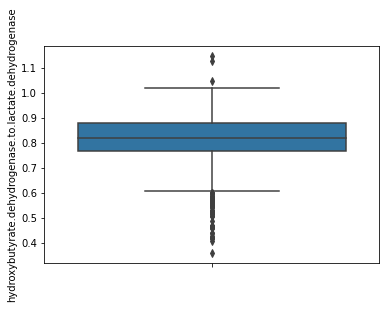

In [234]:
sns.boxplot(y=data[column_name])

### 97) hydroxybutyrate.dehydrogenase

<AxesSubplot:xlabel='hydroxybutyrate.dehydrogenase', ylabel='Count'>

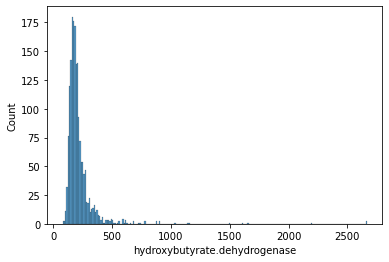

In [235]:
column_name = 'hydroxybutyrate.dehydrogenase'
sns.histplot(data[column_name])

In [236]:
perc_anomalies = in_range(data[column_name],90,180)
perc_anomalies

0.4860557768924303

<AxesSubplot:ylabel='hydroxybutyrate.dehydrogenase'>

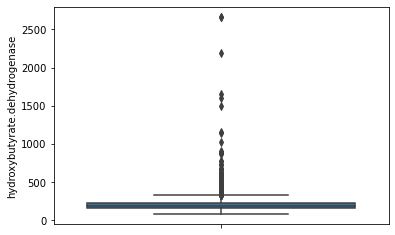

In [237]:
sns.boxplot(y=data[column_name])

There are more values that are more bigger than the reference values:

In [238]:
data[data[column_name]>1400].index.tolist()

[836026, 829127, 827471, 799605, 819538, 736630]

### 98) glutamic.oxaloacetic.transaminase

<AxesSubplot:xlabel='glutamic.oxaloacetic.transaminase', ylabel='Count'>

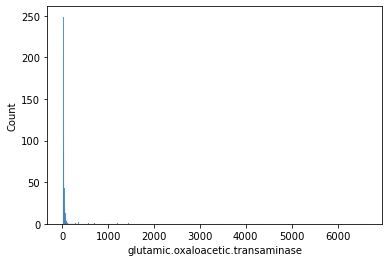

In [239]:
column_name = 'glutamic.oxaloacetic.transaminase'
sns.histplot(data[column_name])

In [240]:
perc_anomalies = in_range(data[column_name],15,40)
perc_anomalies

0.26294820717131473

<AxesSubplot:ylabel='glutamic.oxaloacetic.transaminase'>

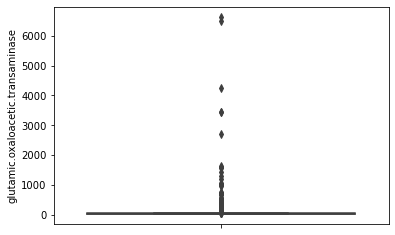

In [241]:
sns.boxplot(y=data[column_name])

There are more values that are more bigger than the reference values. The outliers are:

In [242]:
data[data[column_name]>2000].index.tolist()

[798240, 868283, 754892, 827471, 799605, 819538]

### 99) creatine.kinase

<AxesSubplot:xlabel='creatine.kinase', ylabel='Count'>

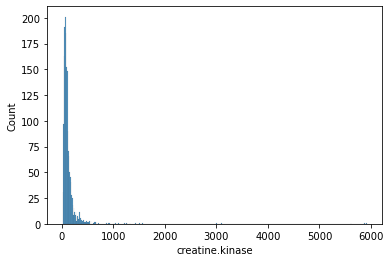

In [243]:
column_name = 'creatine.kinase'
sns.histplot(data[column_name])

In [244]:
perc_anomalies = in_range(data[column_name],22,270)
perc_anomalies

0.06274900398406374

<AxesSubplot:ylabel='creatine.kinase'>

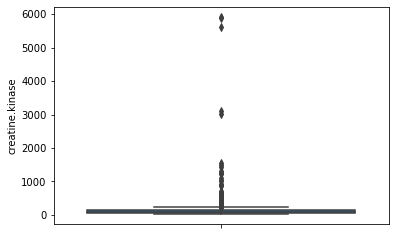

In [245]:
sns.boxplot(y=data[column_name])

There are more values that are more bigger than the reference values. The outliers are:

In [246]:
data[data[column_name]>2000].index.tolist()

[836026, 826826, 869467, 797195, 819538]

### 100) creatine.kinase.isoenzyme

<AxesSubplot:xlabel='creatine.kinase.isoenzyme', ylabel='Count'>

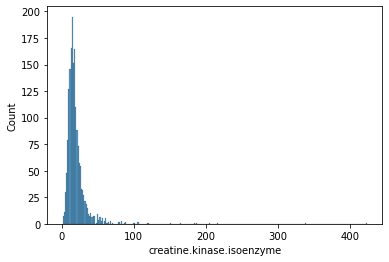

In [247]:
column_name = 'creatine.kinase.isoenzyme'
sns.histplot(data[column_name])

In [248]:
perc_anomalies = in_range(data[column_name],0,32)
perc_anomalies

0.08117529880478087

<AxesSubplot:ylabel='creatine.kinase.isoenzyme'>

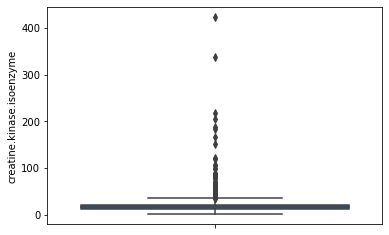

In [249]:
sns.boxplot(y=data[column_name])

The outliers are:

In [250]:
data[data[column_name]>300].index.tolist()

[869467, 797195]

### 101) lactate.dehydrogenase

<AxesSubplot:xlabel='lactate.dehydrogenase', ylabel='Count'>

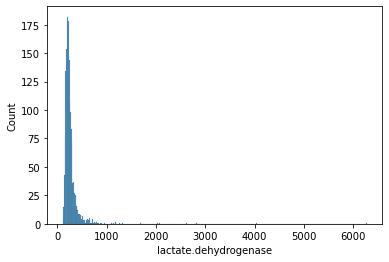

In [251]:
column_name = 'lactate.dehydrogenase'
sns.histplot(data[column_name])

In [252]:
perc_anomalies = in_range(data[column_name],90,282)
perc_anomalies

0.2151394422310757

<AxesSubplot:ylabel='lactate.dehydrogenase'>

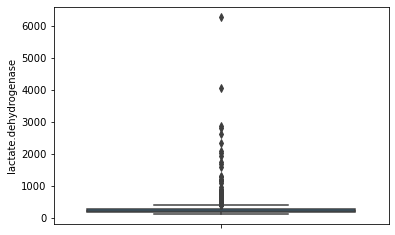

In [253]:
sns.boxplot(y=data[column_name])

The outliers are:

In [254]:
data[data[column_name]>3000].index.tolist()

[827471, 819538]

### 102) brain.natriuretic.peptide

<AxesSubplot:xlabel='brain.natriuretic.peptide', ylabel='Count'>

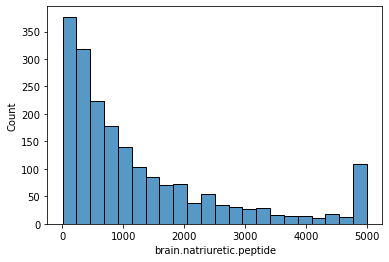

In [326]:
column_name = 'brain.natriuretic.peptide'
sns.histplot(data[column_name])

In [327]:
perc_anomalies = in_range(data[column_name],0,100)
perc_anomalies

0.9093625498007968

<AxesSubplot:ylabel='brain.natriuretic.peptide'>

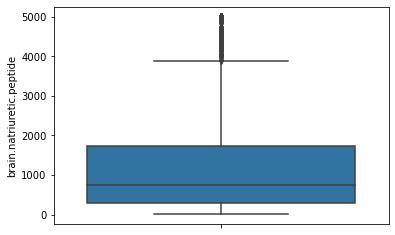

In [328]:
sns.boxplot(y=data[column_name])

There are more values that are 20 times bigger than the reference values.

In [258]:
data[data[column_name]>4000].index.tolist()

[744167,
 759947,
 814869,
 739615,
 857297,
 864312,
 864678,
 804640,
 833497,
 736369,
 746782,
 777721,
 817948,
 863086,
 780824,
 791736,
 764366,
 821985,
 865526,
 785252,
 820582,
 793909,
 777978,
 791740,
 786996,
 782674,
 795619,
 862169,
 840155,
 856223,
 742953,
 760663,
 868283,
 863944,
 856206,
 738288,
 759319,
 777112,
 852898,
 849047,
 809271,
 852259,
 736704,
 842728,
 750910,
 816037,
 867530,
 809536,
 735228,
 859561,
 800349,
 780573,
 747900,
 777335,
 829800,
 782318,
 762608,
 731577,
 735035,
 824103,
 785225,
 770180,
 814085,
 761601,
 741267,
 825484,
 735749,
 765698,
 862248,
 798002,
 865283,
 799499,
 807659,
 806036,
 834294,
 845261,
 808787,
 823447,
 862214,
 832696,
 825736,
 735177,
 743489,
 779822,
 862470,
 768479,
 758102,
 790988,
 807955,
 749668,
 826079,
 827471,
 795921,
 802322,
 738528,
 828959,
 833791,
 809342,
 863059,
 765343,
 761822,
 800421,
 799605,
 806025,
 835198,
 761934,
 780982,
 798882,
 803405,
 785957,
 774448,
 

### 103) nucleotidase

<AxesSubplot:xlabel='nucleotidase', ylabel='Count'>

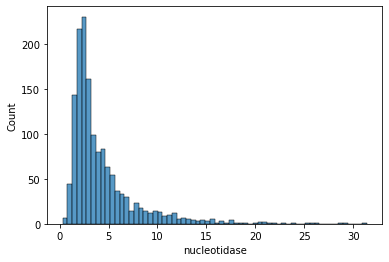

In [329]:
column_name = 'nucleotidase'
sns.histplot(data[column_name])

In [331]:
perc_anomalies = in_range(data[column_name],0,10)
perc_anomalies

0.052788844621513946

<AxesSubplot:ylabel='nucleotidase'>

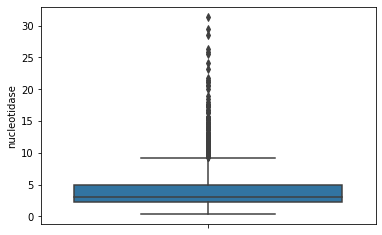

In [332]:
sns.boxplot(y=data[column_name])

### 104) fucosidase

<AxesSubplot:xlabel='fucosidase', ylabel='Count'>

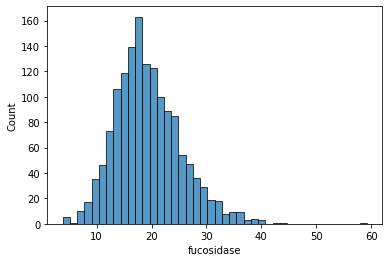

In [259]:
column_name = 'fucosidase'
sns.histplot(data[column_name])

In [260]:
perc_anomalies = in_range(data[column_name],0,40)
perc_anomalies

0.00149402390438247

<AxesSubplot:ylabel='fucosidase'>

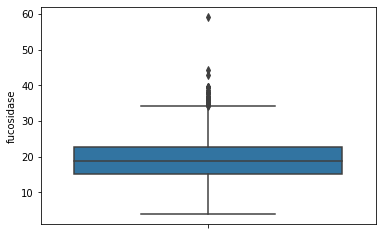

In [261]:
sns.boxplot(y=data[column_name])

### 105) albumin

<AxesSubplot:xlabel='albumin', ylabel='Count'>

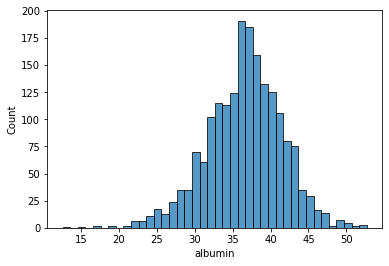

In [262]:
column_name = 'albumin'
sns.histplot(data[column_name])

In [263]:
perc_anomalies = in_range(data[column_name],40,55)
perc_anomalies

0.7211155378486056

<AxesSubplot:ylabel='albumin'>

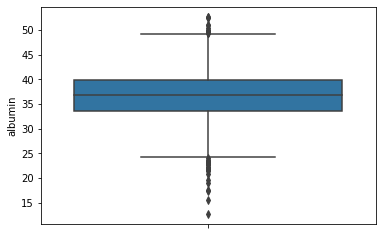

In [264]:
sns.boxplot(y=data[column_name])

### 106) white.globulin.ratio

<AxesSubplot:xlabel='white.globulin.ratio', ylabel='Count'>

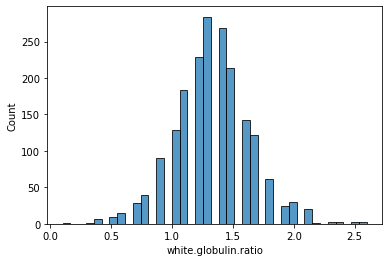

In [265]:
column_name = 'white.globulin.ratio'
sns.histplot(data[column_name])

In [266]:
perc_anomalies = in_range(data[column_name],1.2,2.4)
perc_anomalies

0.25149402390438247

<AxesSubplot:ylabel='white.globulin.ratio'>

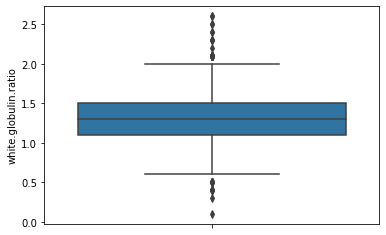

In [267]:
sns.boxplot(y=data[column_name])

### 107) glutamyltranspeptidase

<AxesSubplot:xlabel='glutamyltranspeptidase', ylabel='Count'>

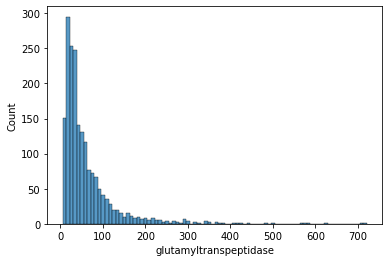

In [268]:
column_name = 'glutamyltranspeptidase'
sns.histplot(data[column_name])

<AxesSubplot:xlabel='glutamyltranspeptidase', ylabel='Count'>

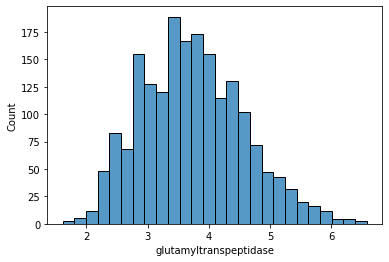

In [269]:
sns.histplot(np.log(data[column_name]))

In [270]:
perc_anomalies = in_range(data[column_name],10,60)
perc_anomalies

0.31772908366533864

<AxesSubplot:ylabel='glutamyltranspeptidase'>

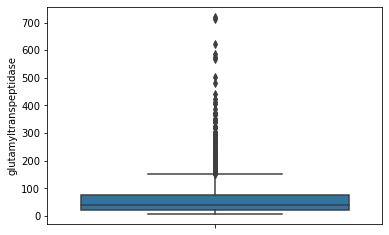

In [271]:
sns.boxplot(y=data[column_name])

Columns with values that are 10 times the reference values:

In [272]:
data[data[column_name]>600].index.tolist()

[746731, 853905, 821499]

### 108) glutamic.pyruvic.transaminase

<AxesSubplot:xlabel='glutamic.pyruvic.transaminase', ylabel='Count'>

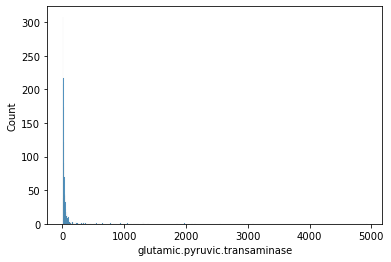

In [273]:
column_name = 'glutamic.pyruvic.transaminase'
sns.histplot(data[column_name])

In [274]:
perc_anomalies = in_range(data[column_name],9,50)
perc_anomalies

0.21165338645418327

<AxesSubplot:ylabel='glutamic.pyruvic.transaminase'>

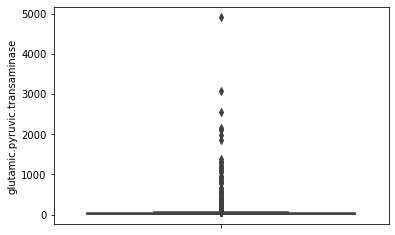

In [275]:
sns.boxplot(y=data[column_name])

Values that are outliers: 

In [276]:
data[data[column_name]>3000].index.tolist()

[765343, 773886]

### 109) indirect.bilirubin

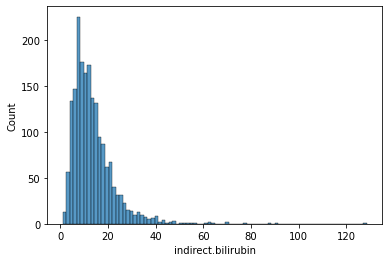

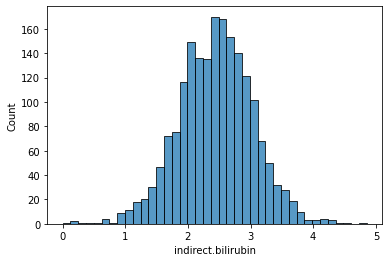

In [277]:
column_name = 'indirect.bilirubin'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [278]:
perc_anomalies = in_range(data[column_name],0,16)
perc_anomalies

0.2684262948207171

<AxesSubplot:ylabel='indirect.bilirubin'>

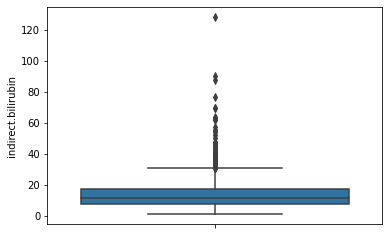

In [279]:
sns.boxplot(y=data[column_name])

### 110) alkaline.phosphatase

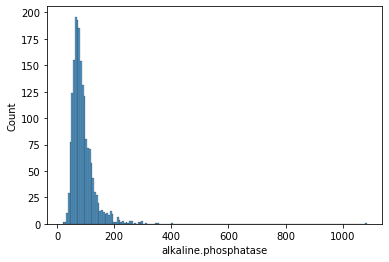

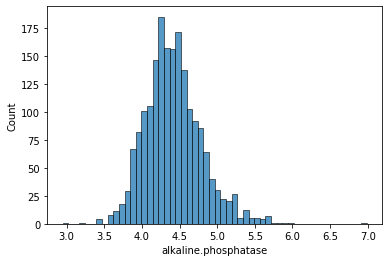

In [280]:
column_name = 'alkaline.phosphatase'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [281]:
perc_anomalies = in_range(data[column_name],45,125)
perc_anomalies

0.14143426294820718

<AxesSubplot:ylabel='alkaline.phosphatase'>

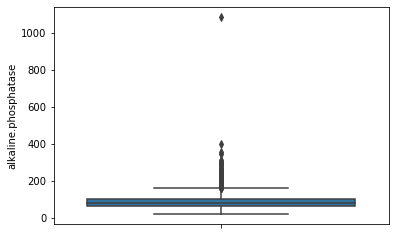

In [282]:
sns.boxplot(y=data[column_name])

The outlier is:

In [283]:
data[data[column_name]>600].index.tolist()

[864040]

### 111) globulin

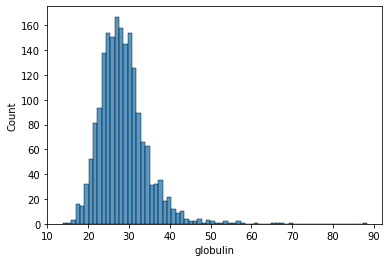

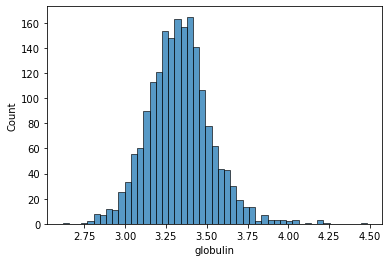

In [284]:
column_name = 'globulin'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [285]:
perc_anomalies = in_range(data[column_name],20,40)
perc_anomalies

0.06623505976095617

<AxesSubplot:ylabel='globulin'>

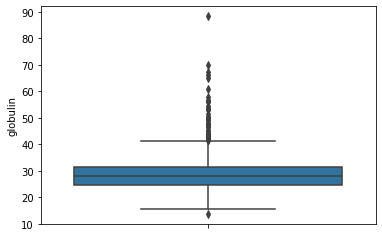

In [286]:
sns.boxplot(y=data[column_name])

### 112) direct.bilirubin

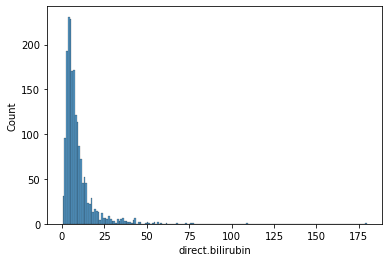

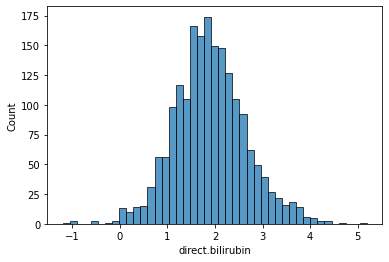

In [287]:
column_name = 'direct.bilirubin'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [288]:
perc_anomalies = in_range(data[column_name],0,6.8)
perc_anomalies

0.4407370517928287

<AxesSubplot:ylabel='direct.bilirubin'>

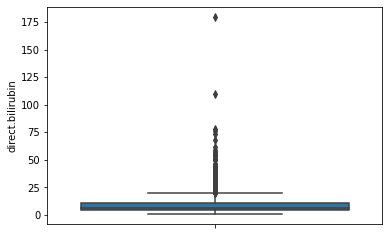

In [289]:
sns.boxplot(y=data[column_name])

The outliers are:

In [290]:
data[data[column_name]>100].index.tolist()

[857297, 739403]

### 113) total.bilirubin

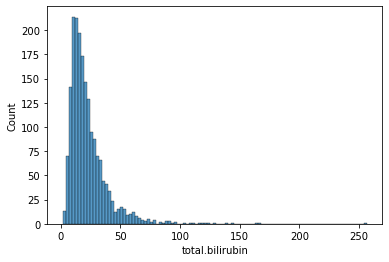

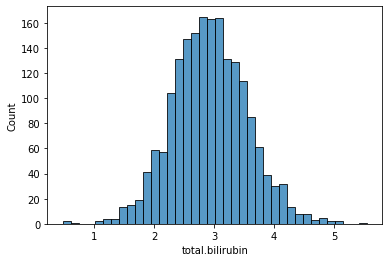

In [291]:
column_name = 'total.bilirubin'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [292]:
perc_anomalies = in_range(data[column_name],2,20.4)
perc_anomalies

0.40886454183266935

<AxesSubplot:ylabel='total.bilirubin'>

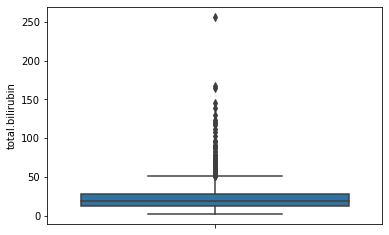

In [293]:
sns.boxplot(y=data[column_name])

The outlier is:

In [294]:
data[data[column_name]>200].index.tolist()

[739403]

### 114) total.bile.acid

<AxesSubplot:xlabel='total.bile.acid', ylabel='Count'>

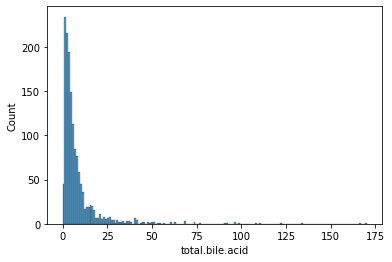

In [295]:
column_name = 'total.bile.acid'
sns.histplot(data[column_name])

In [296]:
perc_anomalies = in_range(data[column_name],0,20)
perc_anomalies

0.060756972111553786

<AxesSubplot:ylabel='total.bile.acid'>

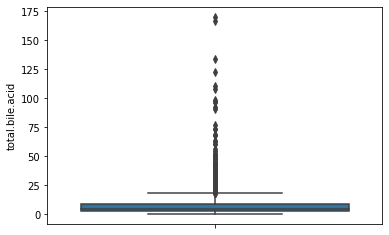

In [297]:
sns.boxplot(y=data[column_name])

The outliers are:

In [298]:
data[data[column_name]>150].index.tolist()

[827204, 739403]

### 115) total.protein

<AxesSubplot:xlabel='total.protein', ylabel='Count'>

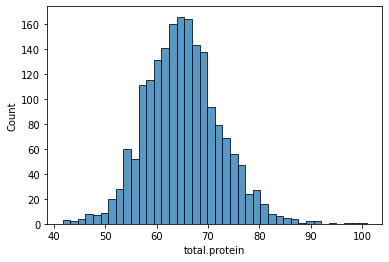

In [299]:
column_name = 'total.protein'
sns.histplot(data[column_name])

In [300]:
perc_anomalies = in_range(data[column_name],65,85)
perc_anomalies

0.49203187250996017

<AxesSubplot:ylabel='total.protein'>

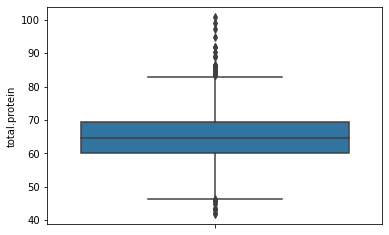

In [301]:
sns.boxplot(y=data[column_name])

### 116) cholesterol

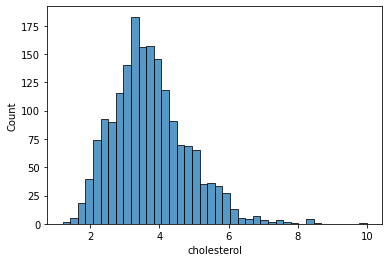

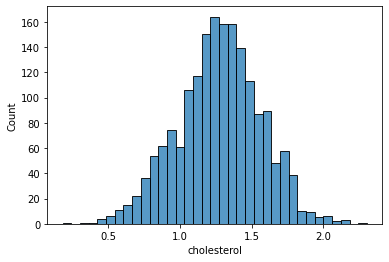

In [302]:
column_name = 'cholesterol'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [303]:
perc_anomalies = in_range(data[column_name],2.9,5.68)
perc_anomalies

0.24402390438247012

<AxesSubplot:ylabel='cholesterol'>

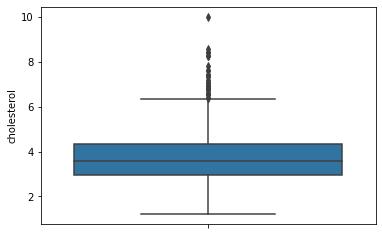

In [304]:
sns.boxplot(y=data[column_name])

### 117) low.density.lipoprotein.cholesterol

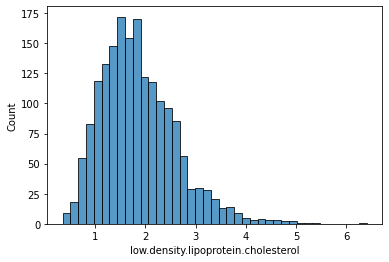

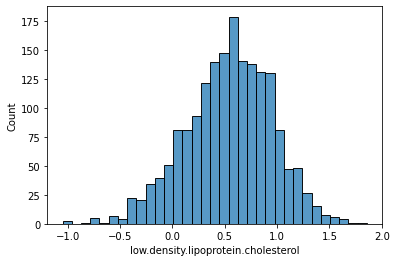

In [305]:
column_name = 'low.density.lipoprotein.cholesterol'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [306]:
perc_anomalies = in_range(data[column_name],0,3.36)
perc_anomalies

0.037350597609561755

<AxesSubplot:ylabel='low.density.lipoprotein.cholesterol'>

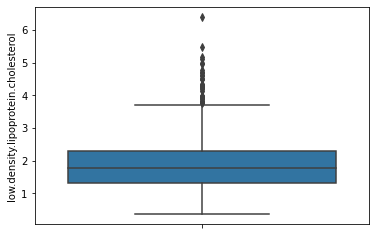

In [307]:
sns.boxplot(y=data[column_name])

### 118) triglyceride

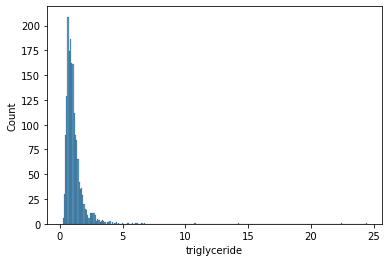

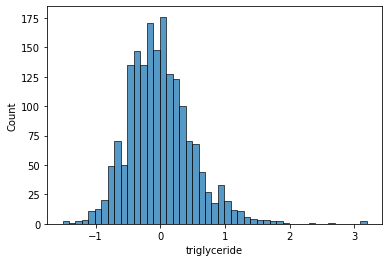

In [308]:
column_name = 'triglyceride'
sns.histplot(data[column_name])
plt.show()
sns.histplot(np.log(data[column_name]))
plt.show()

In [309]:
perc_anomalies = in_range(data[column_name],0.22,2.26)
perc_anomalies

0.055278884462151394

<AxesSubplot:ylabel='triglyceride'>

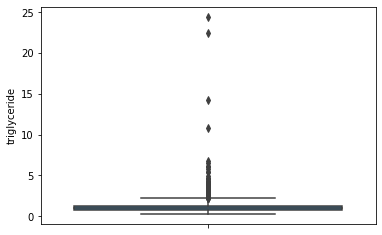

In [310]:
sns.boxplot(y=data[column_name])

The outliers are: 

In [311]:
data[data[column_name]>20].index.tolist()


[838870, 867601]

### 119) high.density.lipoprotein.cholesterol

<AxesSubplot:xlabel='high.density.lipoprotein.cholesterol', ylabel='Count'>

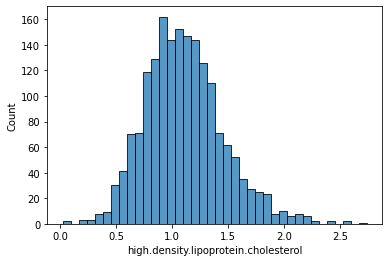

In [312]:
column_name = 'high.density.lipoprotein.cholesterol'
sns.histplot(data[column_name])

In [313]:
perc_anomalies = in_range(data[column_name],0.9,2.19)
perc_anomalies

0.2654382470119522

<AxesSubplot:ylabel='high.density.lipoprotein.cholesterol'>

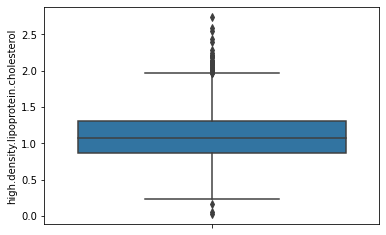

In [314]:
sns.boxplot(y=data[column_name])

### 120) GCS

GCS (Glasgow Coma Scale) is a standardized indicator to evaluate the cognitive impairment state of the patient, measuring through a score its consciousness level.

GCS is the sum of 3 different scores referring to 3 different neurological functions:
- eye opening (1-4)
- verbal response (1-5)
- movement (1-6)

For all of these neurological functions a greater score indicates a greater level of this function, and so, complexively, a greater level of consciousness.

GCS can take values from 3 to 15. 15 corresponds to a conscious patient (best case scenario), while values <=8 corresponds to a coma state.

<AxesSubplot:xlabel='GCS', ylabel='Count'>

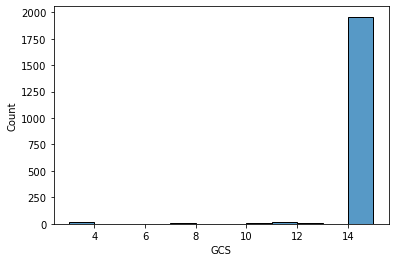

In [10]:
column_name = 'GCS'
sns.histplot(data[column_name])

In [11]:
data[column_name].value_counts()/df.shape[0]

15    0.971614
11    0.009462
3     0.006474
10    0.003486
14    0.003486
7     0.001992
12    0.001494
13    0.000996
6     0.000498
4     0.000498
Name: GCS, dtype: float64

In [12]:
data[column_name].value_counts()

15    1951
11      19
3       13
10       7
14       7
7        4
12       3
13       2
6        1
4        1
Name: GCS, dtype: int64

We observed that the 97% of the patients have 15 in the Glasgow Coma Scale. This means that they are conscious and responsive. 
Moreover, only 20 of our 2008 patients have GCS<8 (which indicates that they are in a coma).

### 121) dischargeDay

<AxesSubplot:xlabel='dischargeDay', ylabel='Count'>

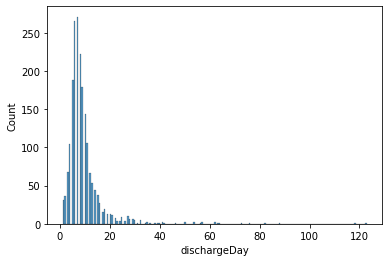

In [317]:
column_name = 'dischargeDay'
sns.histplot(data[column_name])

<AxesSubplot:ylabel='dischargeDay'>

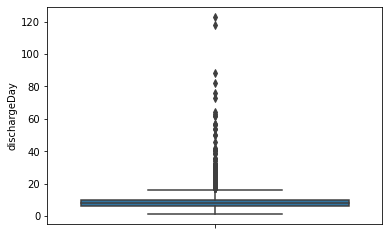

In [318]:
sns.boxplot(y=data[column_name])

### 122) ageCat

<AxesSubplot:xlabel='ageCat', ylabel='Count'>

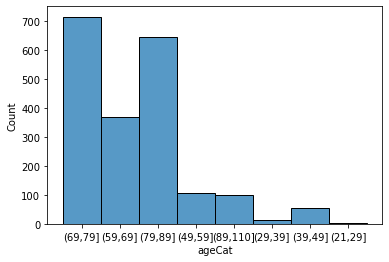

In [319]:
column_name = 'ageCat'
sns.histplot(data[column_name])

## Categorical variables definition

We will consider separately categorical columns and binary columns. Categorical columns need to be converted through One-Hot encoding, but binary columns can stay like that. Indeed, it is redundant because the binary variable is already in a form similar to the one-hot encoded, where the last column is dropped as it does not make any difference with or without it.

Notice that performing One-Hot encoding also for these variables might give collinearity, overfitting and curse of dimensionality problems.

In [333]:
categorical_columns = ['DestinationDischarge','admission.ward','admission.way','occupation','discharge.department',
                       'gender', 'type.of.heart.failure', 'NYHA.cardiac.function.classification', 'Killip.grade',
                       'type.II.respiratory.failure', 'consciousness', 'respiratory.support', 'oxygen.inhalation',
                       'outcome.during.hospitalization', 'GCS','ageCat']


binary_columns = ['myocardial.infarction', 'congestive.heart.failure', 'peripheral.vascular.disease',
                  'cerebrovascular.disease', 'dementia', 'Chronic.obstructive.pulmonary.disease', 'connective.tissue.disease',
                  'peptic.ulcer.disease', 'diabetes', 'moderate.to.severe.chronic.kidney.disease', 'hemiplegia', 'leukemia',
                  'malignant.lymphoma', 'solid.tumor', 'liver.disease', 'AIDS', 'type.II.respiratory.failure', 
                  'acute.renal.failure', 'death.within.28.days', 're.admission.within.28.days', 'death.within.3.months',
                  're.admission.within.3.months', 'death.within.6.months', 're.admission.within.6.months',
                  'return.to.emergency.department.within.6.months']

In [334]:
sentinels={'DestinationDischarge':['Unknown'], 'occupation':['NA'], 
          'pulse':[0],'respiration':[0], 'systolic.blood.pressure':[0],
          'diastolic.blood.pressure':[0], 'map':[0], 'weight':[0,8],
           'height':[0.35,0.48,0.6], 'left.ventricular.end.diastolic.diameter.LV':[0]
          }
# result = pd.read_csv(path + '/ex5.csv', na_values=sentinels)

# Analysis of the variance of the features
We want to know if some features have 0 (or almost 0) variance, to exclude them from the models apriori. Indeed, a variable which has no dispersion in its values, cannot be used to explain the variability in another variable. 
In the previous histplots, we realized that some of the 0/1 categorical variables have very few cases of one of the two categories. The names of these are stored in the list "col_to_exclude" and with a variance analysis we will see that their variance is almost 0.

In [335]:
variance = data.var() 
variance[variance < 0.01]

C:\Users\Eleonora\AppData\Local\Temp/ipykernel_19856/2779144180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = data.var()


height                                                    0.009243
connective.tissue.disease                                 0.001989
hemiplegia                                                0.005943
leukemia                                                  0.000000
malignant.lymphoma                                        0.000498
AIDS                                                      0.001989
acute.renal.failure                                       0.003476
monocyte.ratio                                            0.000701
hematocrit                                                0.004752
basophil.ratio                                            0.000013
basophil.count                                            0.000866
eosinophil.ratio                                          0.000976
platelet.hematocrit                                       0.004585
hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase    0.008924
dtype: float64

In [336]:
# this is only for the first 40 analyzed variables and all are categorical
col_to_exclude

['connective.tissue.disease',
 'hemiplegia',
 'leukemia',
 'malignant.lymphoma',
 'AIDS',
 'acute.renal.failure']

In [337]:
col_to_exclude = list(variance[variance < 0.01].index)
col_to_exclude

['height',
 'connective.tissue.disease',
 'hemiplegia',
 'leukemia',
 'malignant.lymphoma',
 'AIDS',
 'acute.renal.failure',
 'monocyte.ratio',
 'hematocrit',
 'basophil.ratio',
 'basophil.count',
 'eosinophil.ratio',
 'platelet.hematocrit',
 'hydroxybutyrate.dehydrogenase.to.lactate.dehydrogenase']

Next steps:
- remove from the dataset features with almost 0 variance (see above)
- add missing values according to defined sentinels (thus create a new data matrix)
- decide how to treat very extreme values (outliers or not?)
- correlation analysis of the features: exclude features which are highly correlated (more than 90%)
- some data visualization?? pairsplot of continuous variables?
- split the data in train/validation/test and work on train data (normalize it, create a pipeline for data transformation that then should also be applied to validation and test data)

NB: before doing all this, look at the pipeline example given by the professor.